In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Unit import *
from PySpice.Spice.HighLevelElement import PulseMixin
from PySpice.Spice.Simulation import CircuitSimulator

# libraries_path = find_libraries()
libraries_path = '/ltspice/lib/'
spice_library = SpiceLibrary(libraries_path)

# Standard Libraries
import os
import numpy as np 
import pandas as pd 
import random as rn
# import cv2
import torch
import torch.nn as nn
from torch.utils.data import Dataset

# Visualization libraries
# import pydotplus
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
sns.set_style({"axes.facecolor": ".95"})

# Modeling and Machine Learning
from IPython.display import Image 
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
# from sklearn.externals.six import StringIO  
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import tensorflow as tf
from scipy.optimize import  curve_fit

from joblib import dump, load
import time
from tqdm import tqdm 
# from SDT_simple import SDT
# from SDT import SDT
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
# Seed for reproducability
seed = 1024
np.random.seed(seed)
rn.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
#

2024-12-01 10:39:32,496 - numexpr.utils - utils.INFO - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2024-12-01 10:39:32,496 - numexpr.utils - utils.INFO - NumExpr defaulting to 8 threads.


In [126]:
data_all = pd.DataFrame()
for i in np.power(2,np.arange(3,11)):
    data = pd.read_csv('./data_analysis_all_'+str(int(i))+'_t_0.52_.csv')
    data['cell num']=int(i)
    data_all = pd.concat((data_all,data),axis=0)


In [127]:
data_all['error_abs'] = data_all['error'].abs()

In [128]:
data_all

Unnamed: 0     ML(V)  index  P_predict  noise_level     error  cols  \
0              0  0.647226      0   0.660283          0.0  0.013057     8   
1              1  0.608319      1   0.556759          0.0  0.051560     8   
2              2  0.734837      2   0.721601          0.0  0.013236     8   
3              3  0.670040      3   0.692174          0.0  0.022133     8   
4              4  0.613905      4   0.528935          0.0  0.084969     8   
...          ...       ...    ...        ...          ...       ...   ...   
5995         995  0.594545    995   0.697029          0.5 -0.102485  1024   
5996         996  0.600652    996   0.695547          0.5 -0.094895  1024   
5997         997  0.602722    997   0.722815          0.5 -0.120093  1024   
5998         998  0.611831    998   0.693891          0.5 -0.082060  1024   
5999         999  0.605654    999   0.702664          0.5 -0.097010  1024   

      cell num  error_abs  
0            8   0.013057  
1            8   0.051560  
2            8   0.013236  
3            8   0.022133  
4            8   0.084969  
...        ...        ...  
5995      1024   0.102485  
5996      1024   0.094895  
5997      1024   0.120093  
5998      1024   0.082060  
5999      1024   0.097010  

[48000 rows x 9 columns]

In [ ]:
# rmse_all = []
# for i in np.power(2,np.arange(3,11)):
#     # data_select = data_all[(data_all['cols']==i)&(data_all['noise_level']==0.5)]
#     rmse_all.append((data_select['error']*data_select['error']).mean())

In [ ]:
# rmse_all = np.power(rmse_all,0.5)

In [203]:
# plt.rcParams["svg.fonttype"]='none'
# plt.rcParams["font.family"]='Helvetica'
# plt.rcParams["savefig.transparent"]=False
# fig, ax1 = plt.subplots(dpi=600,figsize=(1.76,1.32))
# ax1.set_box_aspect(1.32/1.76)
# ax1 = sns.lineplot(x=np.power(2,np.arange(3,11)),y=rmse_all,linewidth=1,
#                    dashes=False,
#                    markers=True,markersize=3,markeredgewidth=0.5,
#                    errorbar='ci'
#                    )

# # plt.plot(np.power(2,np.arange(3,11)),rmse_all)
# ax1.set_facecolor("white")
# ax1.set_xscale('log')

E:\Users\mxxxc\AppData\Local\Temp\ipykernel_475124\83325848.py:26: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax1.legend([


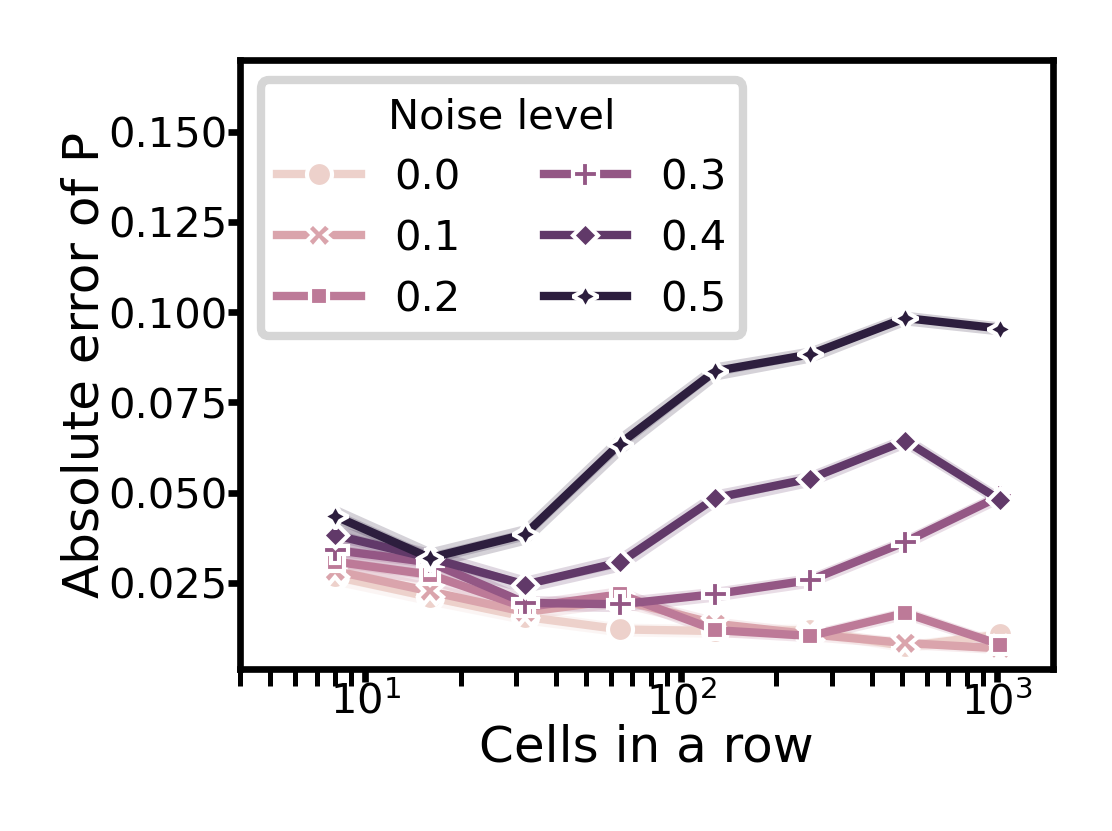

In [251]:
plt.rcParams["svg.fonttype"]='none'
plt.rcParams["font.family"]='Helvetica'
plt.rcParams["savefig.transparent"]=False
fig, ax1 = plt.subplots(dpi=600,figsize=(1.76,1.32))
ax1.set_box_aspect(1.32/1.76)
ax1 = sns.lineplot(data = data_all[data_all['noise_level']>=0.0], x='cell num',y='error_abs',hue='noise_level',style='noise_level',linewidth=1,
                   dashes=False,
                   markers=True,markersize=3,markeredgewidth=0.5,
                   errorbar='ci'
                   )
# 
# ax1 = sns.violinplot(data=data_all[data_all['noise_level']==0.1],x='cell num',y='error',hue='cell num')
# plt.style('white')
ax1.set_facecolor("white")
ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlim([4,1500])
ax1.set_ylim([0.001,0.17])
    # color = 'tab:blue'
# ax1.scatter(x,y,s=10,color=color)
ax1.set_xlabel('Cells in a row',fontsize=6,labelpad=0)
ax1.set_ylabel('Absolute error of P',fontsize=6,labelpad=0)
ax1.tick_params(axis='y', which='major', length=1.5,pad=0,labelsize=5)
ax1.tick_params(axis='x', which='major', length=1.5,pad=0,labelsize=5)
# ax1.legend(['Sim.','Sigmoid'],loc=[0.57,0.7],fontsize=5)
ax1.legend([
    '0.0','_',
            '0.1','_',
            '0.2','_',
            '0.3','_',
            '0.4','_',
            '0.5'
            ]
            ,title ='Noise level',fontsize=5,title_fontsize=5,facecolor='white',ncols=2)
plt.savefig(fname="E:\\The University Of Hong Kong\\CANLab - WEN, Bo - WEN, Bo\\soft tree images\\Column fitting with noise AE.svg",format='svg')
# plt.yscale('log')


E:\Users\mxxxc\AppData\Local\Temp\ipykernel_475124\2974793426.py:31: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax1.legend([


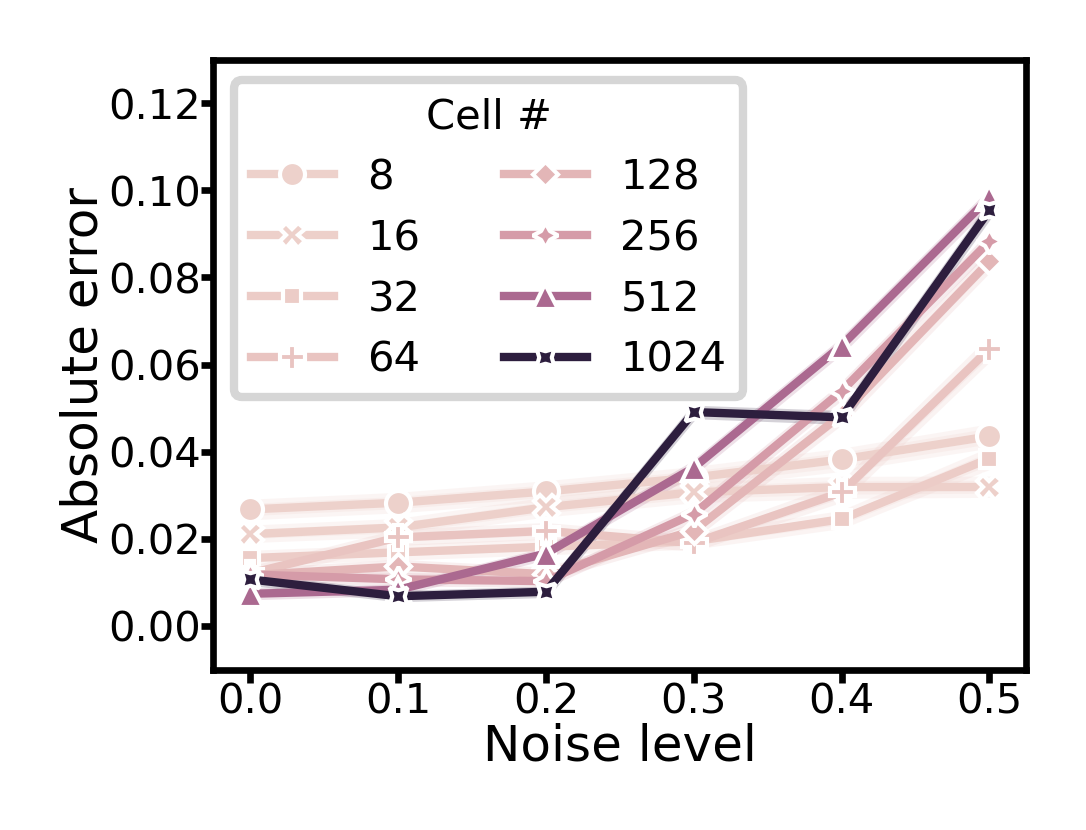

In [239]:
plt.rcParams["svg.fonttype"]='none'
plt.rcParams["font.family"]='Helvetica'
plt.rcParams["savefig.transparent"]=False
fig, ax1 = plt.subplots(dpi=600,figsize=(1.76,1.32))
ax1.set_box_aspect(1.32/1.76)
ax1 = sns.lineplot(data = data_all[data_all['cols'] >=8], x='noise_level',y='error_abs',hue='cell num',style='cell num',linewidth=1,
                   dashes=False,
                   markers=True,markersize=3,markeredgewidth=0.5,
                   errorbar='ci'
                   )
# ax1 = sns.boxplot(data = data_all[data_all['cols'] >=128], x='noise_level',y='error_abs',hue='cell num',linewidth=1,
#                    )
# ax1 = sns.lineplot(data = data_all[data_all['cols'] ==1024], x='noise_level',y='error_abs',hue='cell num',style='cell num',linewidth=1,
#                    dashes=False,
#                    markers=True,markersize=3,markeredgewidth=0.5,
#                    errorbar='ci'
#                    )
# plt.style('white')
ax1.set_facecolor("white")
# ax1.set_xscale('log')
# ax1.set_xlim([4,1500])
ax1.set_ylim([-0.01,0.13])

    # color = 'tab:blue'
# ax1.scatter(x,y,s=10,color=color)
ax1.set_xlabel('Noise level',fontsize=6,labelpad=0)
ax1.set_ylabel('Absolute error',fontsize=6,labelpad=0)
ax1.tick_params(axis='y', which='major', length=1.5,pad=0,labelsize=5)
ax1.tick_params(axis='x', which='major', length=1.5,pad=0,labelsize=5)
# ax1.legend(['Sim.','Sigmoid'],loc=[0.57,0.7],fontsize=5)
ax1.legend([
    '8','_',
            '16','_',
            '32','_',
            '64','_',
            '128','_',
            '256','_',
            '512','_',
            '1024'
            ],
            title ='Cell #',fontsize=5,title_fontsize=5,facecolor='white',loc='upper left',ncols=2)
# plt.savefig(fname="E:\\The University Of Hong Kong\\CANLab - WEN, Bo - WEN, Bo\\soft tree images\\Column fitting with noise r2.svg",format='svg')
# plt.yscale('log')


In [63]:
data = pd.read_csv("result - 副本.csv")

In [64]:
data

Unnamed: 0  Cols_Num  noise_level      rmse         r  t_sample     k  \
0             0         4          0.1  0.082218  0.985623         7 -12.8   
1             1         4          0.1  0.105019  0.976141         3  -7.7   
2             2         4          0.1  0.052862  0.993524         5 -13.6   
3             3         4          0.1  0.081821  0.987675         1  -3.9   
4             4         4          0.1  0.118580  0.975723         1  -3.9   
..          ...       ...          ...       ...       ...       ...   ...   
233          40      1024          0.5  0.068961  0.941819         4  -2.9   
234          41      1024          0.5  0.091941  0.983748         3  -2.7   
235          42      1024          0.5  0.073776  0.989266         3  -2.7   
236          43      1024          0.5  0.095359  0.990583         2  -2.3   
237          44      1024          0.5  0.089330  0.962790         2  -2.2   

        c     a     b  index  
0   -0.24  0.99  0.00      0  
1   -0.10  0.80  0.38      1  
2   -0.24  0.99  0.99      2  
3    0.26  0.60  0.83      3  
4    0.30  0.68  0.49      4  
..    ...   ...   ...    ...  
233  0.10  0.99  0.18      0  
234  0.30  0.97  0.29      1  
235  0.28  0.99  0.39      2  
236  0.60  0.96  0.35      3  
237  0.58  0.99  0.37      4  

[238 rows x 11 columns]

In [67]:
data['r2'] = data['r']*data['r']

E:\Users\mxxxc\AppData\Local\Temp\ipykernel_465000\1727599772.py:22: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax1.legend(['0.1','_','0.2','_','0.3','_','0.4','_','0.5'],title ='noise level',fontsize=5,title_fontsize=5,facecolor='white',loc='lower right')


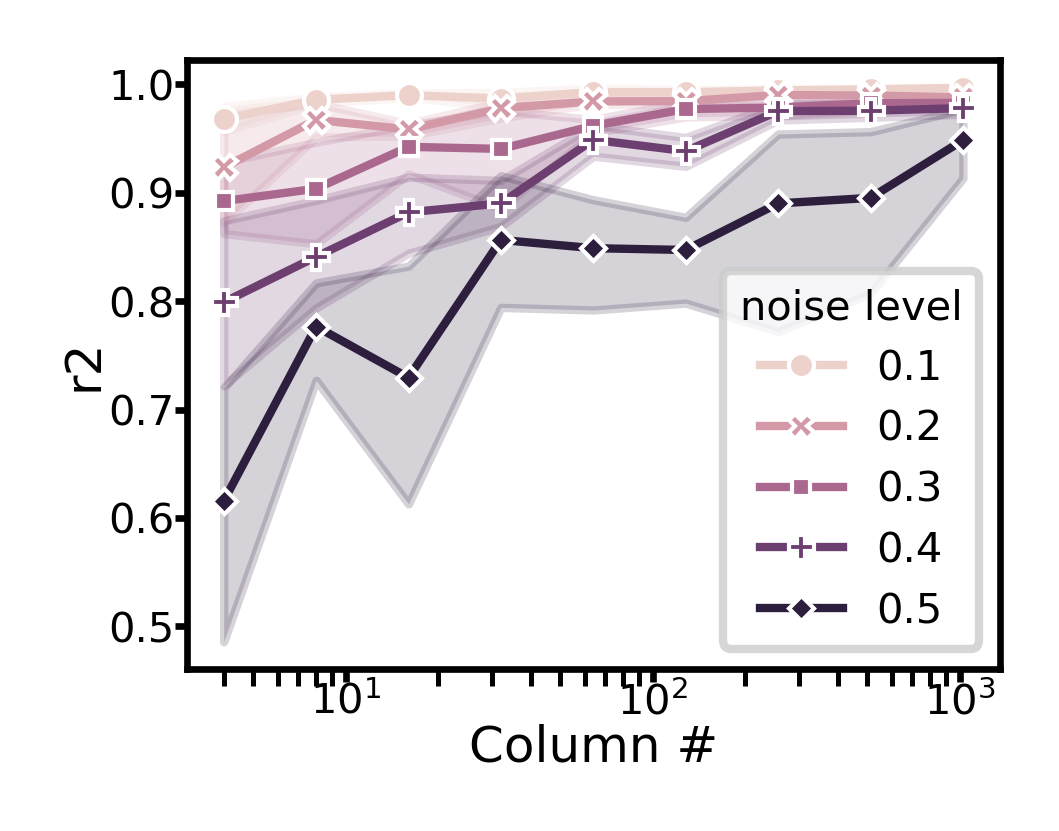

In [70]:
plt.rcParams["svg.fonttype"]='none'
plt.rcParams["font.family"]='Helvetica'
plt.rcParams["savefig.transparent"]=False
fig, ax1 = plt.subplots(dpi=600,figsize=(1.76,1.32))
ax1.set_box_aspect(1.32/1.76)
ax1 = sns.lineplot(data = data, x='Cols_Num',y='r2',hue='noise_level',style='noise_level',linewidth=1,
                   dashes=False,
                   markers=True,markersize=3,markeredgewidth=0.5
                   )
# plt.style('white')
ax1.set_facecolor("white")
ax1.set_xscale('log')


    # color = 'tab:blue'
# ax1.scatter(x,y,s=10,color=color)
ax1.set_xlabel('Column #',fontsize=6,labelpad=0)
ax1.set_ylabel('r2',fontsize=6,labelpad=0)
ax1.tick_params(axis='y', which='major', length=1.5,pad=0,labelsize=5)
ax1.tick_params(axis='x', which='major', length=1.5,pad=0,labelsize=5)
# ax1.legend(['Sim.','Sigmoid'],loc=[0.57,0.7],fontsize=5)
ax1.legend(['0.1','_','0.2','_','0.3','_','0.4','_','0.5'],title ='noise level',fontsize=5,title_fontsize=5,facecolor='white',loc='lower right')
plt.savefig(fname="E:\\The University Of Hong Kong\\CANLab - WEN, Bo - WEN, Bo\\soft tree images\\Column fitting with noise r2.svg",format='svg')
# plt.yscale('log')


E:\Users\mxxxc\AppData\Local\Temp\ipykernel_465000\2998676440.py:22: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax1.legend(['0.1','_','0.2','_','0.3','_','0.4','_','0.5'],title ='noise level',fontsize=5,title_fontsize=5,facecolor='white',loc='upper right')


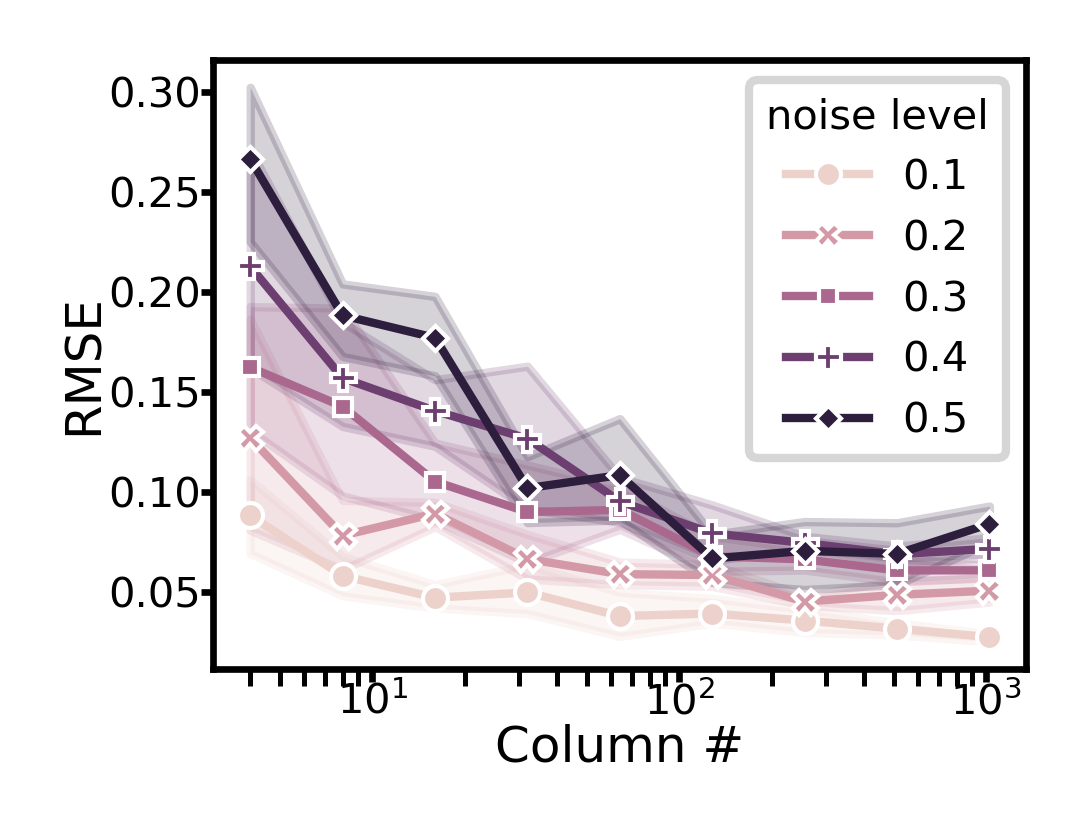

In [66]:
plt.rcParams["svg.fonttype"]='none'
plt.rcParams["font.family"]='Helvetica'
plt.rcParams["savefig.transparent"]=False
fig, ax1 = plt.subplots(dpi=600,figsize=(1.76,1.32))
ax1.set_box_aspect(1.32/1.76)
ax1 = sns.lineplot(data = data, x='Cols_Num',y='rmse',hue='noise_level',style='noise_level',linewidth=1,
                   dashes=False,
                   markers=True,markersize=3,markeredgewidth=0.5
                   )
# plt.style('white')
ax1.set_facecolor("white")
ax1.set_xscale('log')


    # color = 'tab:blue'
# ax1.scatter(x,y,s=10,color=color)
ax1.set_xlabel('Column #',fontsize=6,labelpad=0)
ax1.set_ylabel('RMSE',fontsize=6,labelpad=0)
ax1.tick_params(axis='y', which='major', length=1.5,pad=0,labelsize=5)
ax1.tick_params(axis='x', which='major', length=1.5,pad=0,labelsize=5)
# ax1.legend(['Sim.','Sigmoid'],loc=[0.57,0.7],fontsize=5)
ax1.legend(['0.1','_','0.2','_','0.3','_','0.4','_','0.5'],title ='noise level',fontsize=5,title_fontsize=5,facecolor='white',loc='upper right')
plt.savefig(fname="E:\\The University Of Hong Kong\\CANLab - WEN, Bo - WEN, Bo\\soft tree images\\Column fitting with noise.svg",format='svg')
# plt.yscale('log')


In [9]:
np.random.randn(5,5).std()

0.8119013130181513

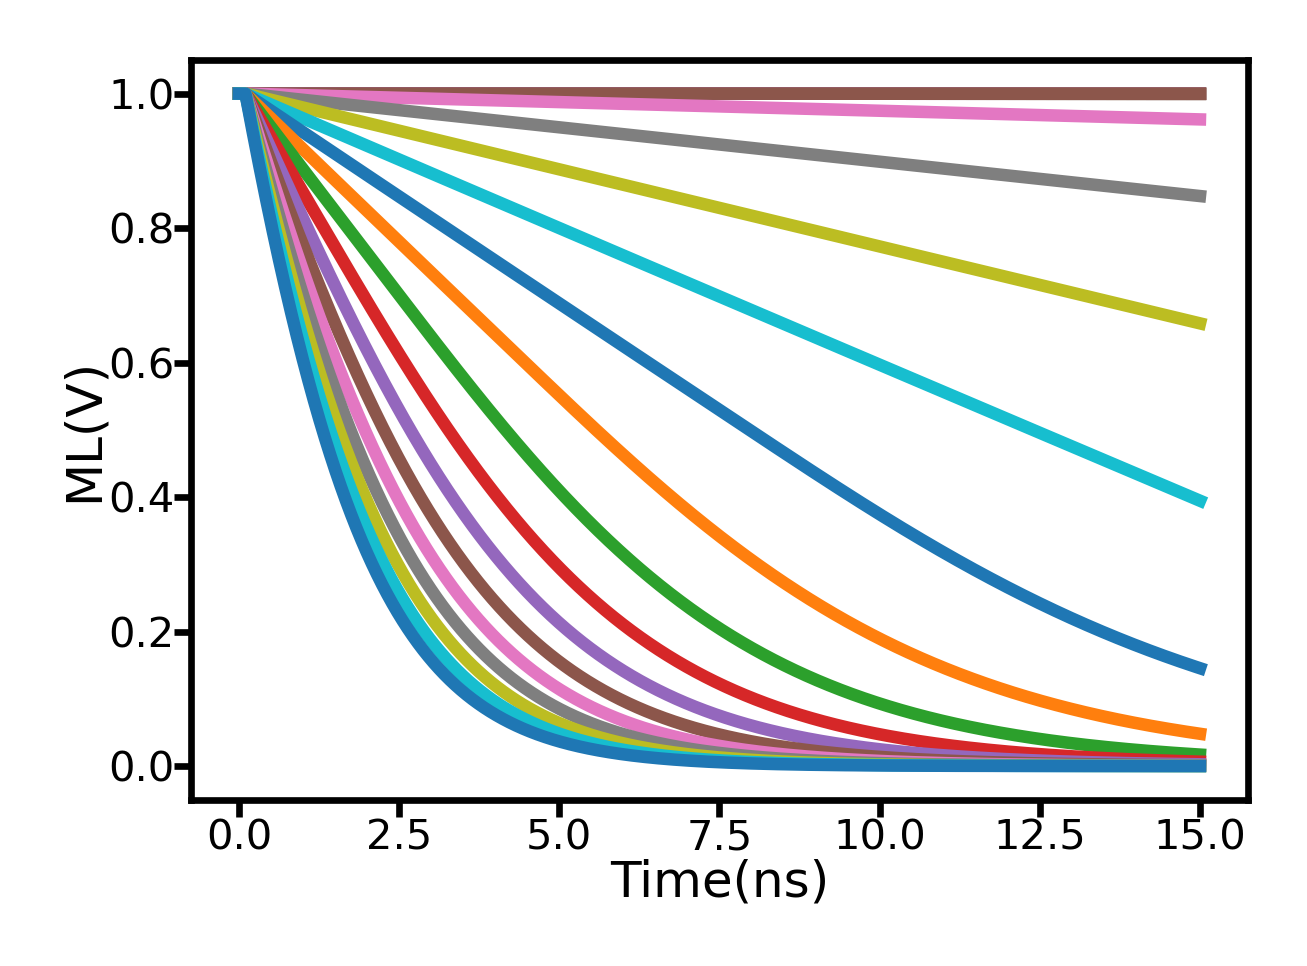

In [39]:
ML_all = pd.DataFrame()
Is_row_list=[1e-8,1e-9,1e-10,1e-11,1e-13]
On_off_list = ['3','4','5','6','7']
noise_level = 0.0
# for Cols_Num_power in np.arange(3,10):
for Cols_Num_power in [6]:
    fig, ax = plt.subplots(dpi=600,figsize=(2.28,1.71),layout='tight')
    for V_s in np.arange(-1,1.1,0.1):
        # Cols_Num_power = 4
        Rows_Num = 2
        Cols_Num = np.power(2,Cols_Num_power)
        # Cols_Num  =1


        plt.style.use('default')
        V_offset=0
        C_ml=125*Cols_Num*1e-18
        # C_ml=500*1e-12
        C_ml_old = C_ml*124.3649414
        K=1e-6 
        # K = 8e-4
        W=20e-6 
        L=7e-9 
        KP = K/W*L  
        # KP_old = 1e-6/W*L
        Vt_0=0
        Is_set = Is_row_list[4]

        plt.rcParams["svg.fonttype"]='none'
        plt.rcParams["font.family"]='Helvetica'
        plt.rcParams["savefig.transparent"]=True

        # circuit.V('ctl','CTL',0,PULSE(0 3.3 5m 2u 2u 15m 20))

        # Vt_array = np.random.rand(Rows_Num, Cols_Num*2)*2
        # Vt_array = np.array([
        #     [-0.4775,2,2,2,2,2,2,2],
        #     [2,0.4098,0.3570,2,0.3601,2,2,2],
        #     [2,0.3548,0.3549,2,2,-0.3961,2,2],
        #     [2,0.3652,2,-0.3971,0.2591,2,2,2],
        #     [2,0.3652,2,-0.3533,2,-0.2903,2,2]
        # ])
        Vt_array = np.array([
            
            # [3.3,0,3.3,0,3.3,0,3.3,0],
            # [3.3,0,3.3,0,3.3,0,3.3,0],
            [3.3,3.3,3.3,3.3,3.3,3.3,3.3,3.3],
            # [0,3.3,0,3.3,0,3.3,0,3.3],
            [3.3,1,3.3,1,3.3,1,3.3,1],
            [-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8],
            [-1,-1,-1,-1,-1,-1,-1,-1],
            [0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0],
            [0,0,0,0,0,0,0,0]
            # [-1,-1,-1,-1,-1,-1,-1,-1]
        ])-0.5
        if Cols_Num_power>2:
            for i in range(Cols_Num_power-1):
                Vt_array = np.concatenate((Vt_array,Vt_array),1)
        # Vt_array = np.concatenate((Vt_array,Vt_array),1)

        Vsl_array = np.ones([1, Cols_Num])*V_s
        

        # Vsl_array = np.random.rand(1, Cols_Num)
        # for kk in range(np.power(2,Cols_Num_power-2)):
        for kk in range(np.power(2,int(Cols_Num_power-np.minimum(4,Cols_Num_power)))):
            Vt_array[0,kk*2]=-0.5
        # Vt_array[2,:]=-1
        Vt_array = Vt_array + np.random.randn(Vt_array.shape[0],Vt_array.shape[1])*noise_level


        # for index in range(len(Vsl_target)):
        for index in [0]:

            # Vsl_array = Vsl_target[index].reshape([1,-1])
            circuit = Circuit('Analog CAM array '+str(Rows_Num)+' by '+str(Cols_Num))

        # new_data = np.load('data_array.npz')
        # Vt_array = new_data['name1']
        # Vsl_array = new_data['name2']
            
            for i in np.arange(Rows_Num):
                if i==0:
                    circuit.C('_'+str(i),'ML'+str(i),circuit.gnd,C_ml)
                    Is_row = Is_set
                else:
                    if i==1:
                        circuit.C('_'+str(i),'ML'+str(i),circuit.gnd,C_ml) #1.2
                        Is_row = Is_set
                    else:
                        if i==2:
                            circuit.C('_'+str(i),'ML'+str(i),circuit.gnd,C_ml) #2.1
                            Is_row = Is_set
                            # Vsl_array = np.ones([1, Cols_Num])*(-1)
                        else:
                            if i==3:
                                circuit.C('_'+str(i),'ML'+str(i),circuit.gnd,C_ml) # 2.9
                                Is_row = Is_set
                            else:
                                circuit.C('_'+str(i),'ML'+str(i),circuit.gnd,C_ml) #2.9
                                Is_row = Is_set
                
                # circuit.X('U'+str(i), 'ADG711','CTL', 'ML'+str(i), 'VCC', 0, 'VCC')
                for cc in range(int(Cols_Num/2)):
                    circuit.M('P_'+str(i)+str(cc), 'ML'+str(i),'CTL', 'VCC', 'VCC', model='P1')
                    # circuit.M('P__'+str(i)+str(cc), 'ML'+str(i),'CTL', 'VCC', 'VCC', model='P1')
                    # circuit.M('P___'+str(i)+str(cc), 'ML'+str(i),'CTL', 'VCC', 'VCC', model='P1')
                    # circuit.M('P____'+str(i)+str(cc), 'ML'+str(i),'CTL', 'VCC', 'VCC', model='P1')
                    # circuit.M('P_____'+str(i)+str(cc), 'ML'+str(i),'CTL', 'VCC', 'VCC', model='P1')
                if Cols_Num<2:
                    circuit.M('P_'+str(i), 'ML'+str(i),'CTL', 'VCC', 'VCC', model='P1')

                circuit.R('R_'+str(i), 'ML'+str(i), circuit.gnd,1e8*1@u_kΩ)
                
                for j in np.arange(Cols_Num):
                    
                        
                    circuit.model('NMOS_'+'L'+str(i)+'_'+str(j), 'NMOS', KP=KP, W=20e-6, L=7e-9, RS=0, Rd=0, VTO=Vt_array[i,j*2], Lambda=0.022306813197742, Ksubthres=250e-5, Is=Is_row, mtriode=0.95)
                    circuit.model('NMOS_'+'R'+str(i)+'_'+str(j), 'NMOS', KP=KP, W=20e-6, L=7e-9, RS=0, Rd=0, VTO=Vt_array[i,j*2+1], Lambda=0.022306813197742, Ksubthres=250e-5, Is=Is_row, mtriode=0.95)
                    # circuit.model('NMOS_'+'R'+str(i)+'_'+str(j), 'NMOS', KP=KP, W=20e-6, L=7e-9, RS=0, Rd=0, VTO=Vt_array[i,j*2+1], Lambda=0.022306813197742, Ksubthres=250e-3, Is=1e-15, mtriode=0.95)
                    circuit.M('_'+'L'+str(i)+'_'+str(j),'ML'+str(i),'SL'+str(j),circuit.gnd,circuit.gnd,model='NMOS_'+'L'+str(i)+'_'+str(j))
                    circuit.M('_'+'R'+str(i)+'_'+str(j),'ML'+str(i),'SL_bar'+str(j),circuit.gnd,circuit.gnd,model='NMOS_'+'R'+str(i)+'_'+str(j))
                    if i==0:
                            circuit.PulseVoltageSource('V_SL_'+str(j),'SL'+str(j),circuit.gnd,initial_value = -3,pulsed_value=Vsl_array[0,j],pulse_width=14.9@u_ns,period=15@u_ns,delay_time=.1@u_ns)
                                # circuit.V('_SL_bar_'+str(j),'SL_bar'+str(j),circuit.gnd, V_offset - Vsl_array[0,j])
                            circuit.PulseVoltageSource('V_SL_bar_'+str(j),'SL_bar'+str(j),circuit.gnd,initial_value = -3,pulsed_value=V_offset -Vsl_array[0,j],pulse_width=14.9@u_ns,period=15@u_ns,delay_time=.1@u_ns)
                        



            # circuit.PulseVoltageSource('ctl','CTL',circuit.gnd,initial_value=-5,pulsed_value=5,pulse_width=0.15@u_ns,period=0.2@u_ns,delay_time=.05@u_ns)
            circuit.PulseVoltageSource('ctl','CTL',circuit.gnd,initial_value=-5,pulsed_value=5,pulse_width=14.9@u_ns,period=15@u_ns,delay_time=.1@u_ns)
            circuit.V('cc','VCC',circuit.gnd,1)
            # circuit.include(spice_library['ADG'])
            # new_line = '.lib ./ltspice/lib/ADG711.sub'
            # circuit.raw_spice += new_line + os.linesep

            # new_line = 'Vctl CTL 0 PULSE(0 3.3 .5m 2u 2u 1.5m 20)'
            # circuit.raw_spice += new_line + os.linesep
            # PulseMixin(
            #     circuit,
            #     'pwl1', '1', '0',
            #     values=[(0, 0), (10@u_ms, 0), (11@u_ms, 5@u_V), (20@u_ms, 5@u_V)],
            # )
            # circuit.V('Vctl','CTL',0, PulseMixin(3.3,0.5@u_ms,2@u_ms,0,10@u_us,10@u_us))

            # circuit.pulse('Vctl', 'CTL', 0, 0@u_V, 3.3@u_V, 0.5@m_s, 1@u_s, 2@u_s, 5@u_s, 10@u_s, 20@u_s)
            # circuit.model('PMOS', 'PMOS','level =49', 'version =3.3.0')
            circuit.model('P1', 'PMOS')

            # print(str(circuit))
            simulator = circuit.simulator(temperature=25, nominal_temperature=25)
            # simulator = CircuitSimulator(circuit, 'xyce')
            # analysis = simulator.transient(step_time=0.001@u_ns,end_time=0.20@u_ns)
            analysis = simulator.transient(step_time=0.001@u_ns,end_time=15@u_ns)
            # analysis = simulator.dc(V_SL_0 =slice(-3, 12, .1))
            # analysis = simulator.transient(step_time=1e9, end_time=100e9)
            # figure, ax = plt.subplots(figsize=(8, 6))
            # sns.set_theme(style='whitegrid',font='Times New Roman',font_scale=1)
            # plt.rc('font',family='Times New Roman')
            # plt.rcParams["font.sans-serif"] = ["Times New Roman"]
            # ax.plot(analysis['ML0'], u_mA(-analysis.Vdd))
            # ax.plot(analysis['SL0'],analysis['ML0'] )
            # ax.plot(analysis['SL0'],analysis['ML1'] )
            # ax.plot(analysis['SL0'],analysis['ML1'] )
            legend_list=[]
            ML_rows = pd.DataFrame()
            
            for ii in np.arange(Rows_Num):
            # for ii in [0]:
                
                t_temp = pd.DataFrame(analysis.time*1e9) 
                
                
                t_temp.columns = ['time']
                # if ii==3:
                #     continue
                if ii==0:
                
                    plt.plot(t_temp['time'],analysis['ML'+str(ii)])
                
                # else:
                #     sns.lineplot(t_temp['time(ms)'],analysis['ML'+str(ii)] ,linestyle='dashed',color='black')

                V_temp = pd.DataFrame(analysis['ML'+str(ii)])
                V_temp.columns = ['ML(V)']
                ML_temp = pd.concat((t_temp,V_temp),axis=1)
                ML_temp['ML']=ii
                ML_temp['Column#']=Cols_Num
                ML_rows = pd.concat((ML_rows,ML_temp),axis=0,ignore_index=True)
                legend_list.append('ML'+str(ii+1))
                if ii>16:
                    break
            ML_rows['input']=V_s
            ML_all = pd.concat((ML_all,ML_rows),axis=0,ignore_index=True)

            # plt.legend(legend_list,fontsize=7.8,loc='best')

            plt.grid(False)
            # ax.set_xlabel('SL0[V]')

            # plt.xlabel('Time($\mu$s)')
            


            plt.xlabel('Time(ns)',fontsize=6,labelpad=0)
            plt.ylabel('ML(V)',fontsize=6,labelpad=0)

            # plt.plot([1.1,1.1],[-1,1.5])
            # plt.xlim([0.05,0.15])
            # plt.ylim([-0.1,1.1])
            # plt.xscale('log')
            # ax = plt.xlabel('Time(s)',fontdict={'family':'Times New Roman','style':'normal'})
            # ax = plt.ylabel('ML(V)',fontdict={'family':'Times New Roman','style':'normal'})
            # ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
            # plt.rc('font',family='Times New Roman')
            # plt.rcParams['axes.facecolor'] = 'white'
            plt.tight_layout()
            # if y_test[index]==0:
            #     right_path = '1'
            # if y_test[index]==1:
            #     right_path = '2'
            # if y_test[index]==2:
            #     right_path = '3,4,5'

            
            # plt.legend(title='On/Off ratio')
            # plt.arrow(x=1.5,y=0,dx=0,dy=0.955,length_includes_head=True,head_width = 0.1,head_length=0.03,fill=True,color='k',shape='left')
            # plt.arrow(x=1.5,y=0,dx=0,dy=0.74,length_includes_head=True,head_width = 0.1,head_length=0.03,fill=True,color='k',shape='right')
            
            # plt.legend(['$10^3$','$10^4$','$10^5$','$10^6$','$10^7$'],fontsize=5,title='On/off ratio',title_fontsize=5)
            # plt.legend()
            ax.tick_params(axis='y', which='major', length=2,pad=0,labelsize=5)
            ax.tick_params(axis='x', which='major', length=2,pad=0.2,labelsize=5)
            # plt.title('Input '+str(index+1)+', Target class:'+str(y_test[index])+', Right ML should be: ML'+right_path)
            # plt.savefig('./image/Input_'+str(index+1)+'.svg',format='svg',dpi=300,bbox_inches='tight',transparent=True)
            # plt.text(3.8,0.02,'Fully mismatch',fontsize=5)
            # plt.text(1.15,0.3,s='Window for SA: 0.75V',rotation=90,fontsize=5,horizontalalignment='center')
            # plt.text(1.8,0.45,s='Window for SA: 0.97V',rotation=270,fontsize=5,horizontalalignment='center')
            # plt.text(1.45,0.99,'WTA resolution: 5mV',fontsize=5)
    plt.show()
        

In [40]:
def plot_sample(plot_data):
    V_ML_sample=pd.DataFrame()
    for t_sample in np.arange(1,10.05,1):

        V_ML_temp=[]
        
        for Vg_temp in np.arange(-1,1.1,.1):
            data_temp = plot_data[(plot_data['input']-Vg_temp<0.01)&(plot_data['input']-Vg_temp>-0.01)]
            data_temp = data_temp.reset_index(drop=True)
            if len(data_temp)==0:
                continue
            # print(data_temp[np.abs(data_temp['time']-t_sample)==np.min(np.abs(data_temp['time']-t_sample))])
            V_ML_temp.append([Vg_temp,data_temp.iloc[(data_temp['time']-t_sample).abs().idxmin()]['ML(V)']])
        V_ML_temp = pd.DataFrame(V_ML_temp,columns=['Vg','ML(V)'])
        V_ML_temp['t_sample']=np.round(t_sample,1)
        V_ML_sample = pd.concat((V_ML_sample,V_ML_temp),axis=0,ignore_index=True)
    
    ax1 = sns.scatterplot(data=V_ML_sample,x='Vg',y='ML(V)',hue='t_sample',legend='full')
    ax2 = sns.lineplot(data=V_ML_sample,x='Vg',y='ML(V)',hue='t_sample',legend=False,linewidth=2)
    # plt.plot()
    # print(ax1.get_legend_handles_labels())
    # plt.xlim([-3.35,-2.55])
    plt.xlabel('Input(V)')
    plt.legend(title='time(ns)')
    # plt.colorbar()
    # plt.legend(['0.2','0.3','0.4','0.5','0.6','0.7','0.8'])
    return V_ML_sample

In [33]:
ML_all


time     ML(V)  ML  Column#  input
0         0.000000  1.000000   0        8  -1.00
1         0.000005  1.000000   0        8  -1.00
2         0.000010  1.000000   0        8  -1.00
3         0.000020  1.000000   0        8  -1.00
4         0.000040  1.000000   0        8  -1.00
...            ...       ...  ..      ...    ...
2521171  14.998100  0.999589   1        8   1.05
2521172  14.998600  0.999589   1        8   1.05
2521173  14.999100  0.999589   1        8   1.05
2521174  14.999600  0.999589   1        8   1.05
2521175  15.000000  0.999589   1        8   1.05

[2521176 rows x 5 columns]

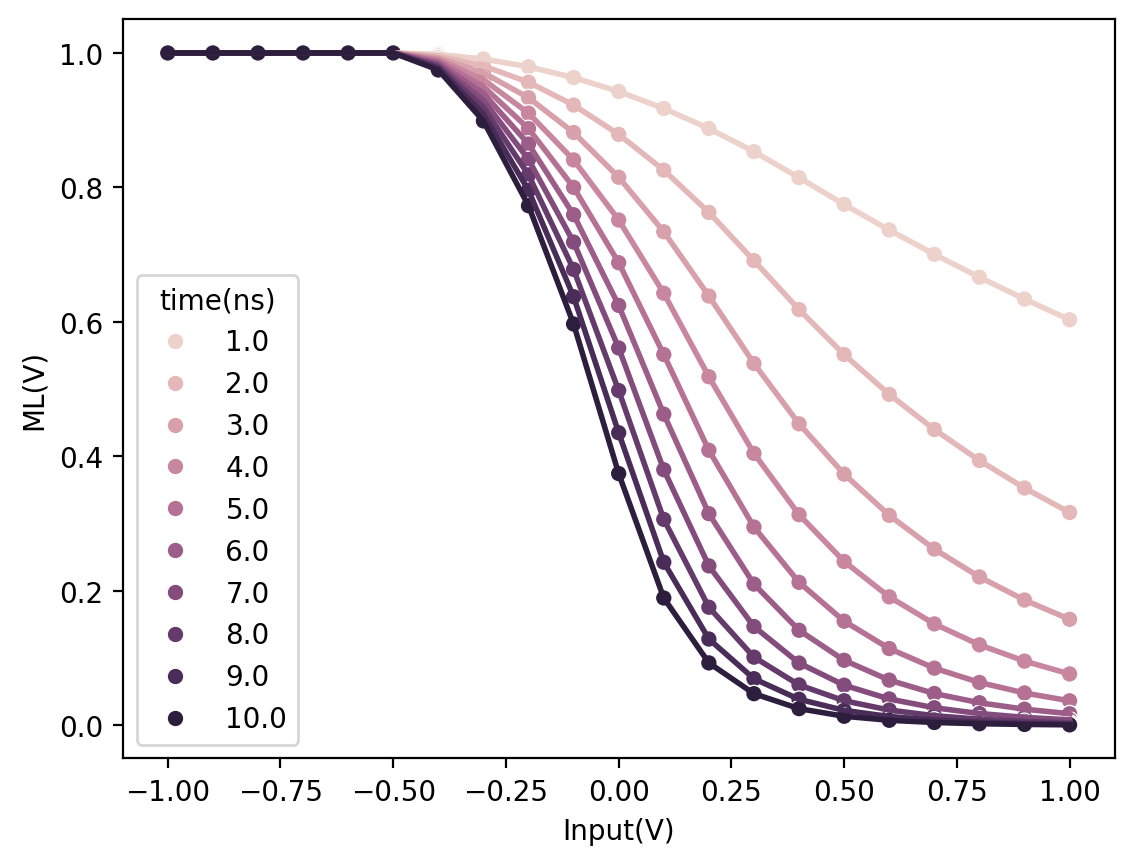

In [41]:
plt.figure(dpi=200)
data_sample = plot_sample(ML_all[ML_all['ML']==0])


In [42]:
def sigmoid(x,k,c):
    y = 1/(1+np.exp(1*k*(x-c)))
    # y = y*0.875-0.065
    return y

def soft_boudary(x,y,c):
    # g = sns.scatterplot(x=x,y=y,s=20)
    fig, ax1 = plt.subplots(dpi=600,figsize=(1.76,1.32))
# fig, ax = plt.subplots(dpi=600,figsize=(2.28,1.71),layout='tight')
    ax1.set_box_aspect(1.32/1.76)
    color = 'tab:blue'
    ax1.scatter(x,y,s=10,color=color)
    ax1.set_xlabel('VDL(V)',fontsize=6,labelpad=0)
    ax1.set_ylabel('ML(V)',fontsize=6,labelpad=0,color=color)
    ax1.tick_params(axis='y', which='major', length=1.5,pad=0,labelsize=5,labelcolor=color)
    ax1.tick_params(axis='x', which='major', length=1.5,pad=0,labelsize=5)
    
    # p = (y + 0.065)/0.875
    p = y
    min_error = 100
    for c in np.arange(c-1,c+1,0.02):
    
        for k in np.arange(-20,0,0.1):
            p_fit = sigmoid(x=x,k=k,c=c)
            error =  (p_fit-p).apply(lambda x: x**2).mean()
            if error<min_error:
                min_error = error
                k_best = k
                c_best = c

    # plt.legend(['exp','sigmoid'])
    print(min_error)
    ax2 = ax1.twinx()
    ax2.set_box_aspect(1.32/1.76)
    p_fit = sigmoid(x=x,k=k_best,c=c_best)
    # g2 = sns.lineplot(x=x,y=p_fit,ax=ax2)
    color = 'tab:red'
    ax2.plot(x,p_fit,color=color,ls='--')
    ax2.set_ylabel('Cell p',fontsize=6,labelpad=0,color=color)
    # ax2.set_xlim([-1,1])
    ax2.tick_params(axis='y', which='major', length=1.5,pad=0,labelsize=5,labelcolor=color)
    # sns.legend(['exp','sigmoid'])
    fig.legend(['Sim.','Sigmoid'],loc=[0.57,0.7],fontsize=5)
    ax1.set_xlim([-1,1])
    ax2.set_xlim([-1,1])
    # fig.tight_layout()
    # g.legend(handles=[Line2D([], [], marker='.', color="b", label='exp'), Line2D([], [], marker='_', color="b", label='sigmoid')])
    # plt.legend(loc='best')
    # g.move_legend(g, "center right")
    # plt.xlim(-4,-2.0)
    # plt.text(-3,0.5,'Sigmoid: k='+str(np.round(k_best,2))+' ,c='+str(c))
    print('Sigmoid: k='+str(np.round(k_best,2))+' ,c='+str(np.round(c_best,2)))
    return p_fit,k_best,c_best,min_error
    


    


0.0009335491480836773
Sigmoid: k=-2.7 ,c=-1.0
0.0010023402552911214
Sigmoid: k=-2.9 ,c=-0.64
0.0010886620133175736
Sigmoid: k=-3.6 ,c=-0.4
0.0008214270226669469
Sigmoid: k=-4.5 ,c=-0.24
0.0005342067377300483
Sigmoid: k=-5.3 ,c=-0.16
0.00033154848712184544
Sigmoid: k=-6.2 ,c=-0.08
0.000183430842294833
Sigmoid: k=-7.0 ,c=-0.04
0.00011225709973664579
Sigmoid: k=-7.7 ,c=0.0
0.00012336428043769007
Sigmoid: k=-8.4 ,c=0.04
5.862204602864994e-05
Sigmoid: k=-9.0 ,c=0.06


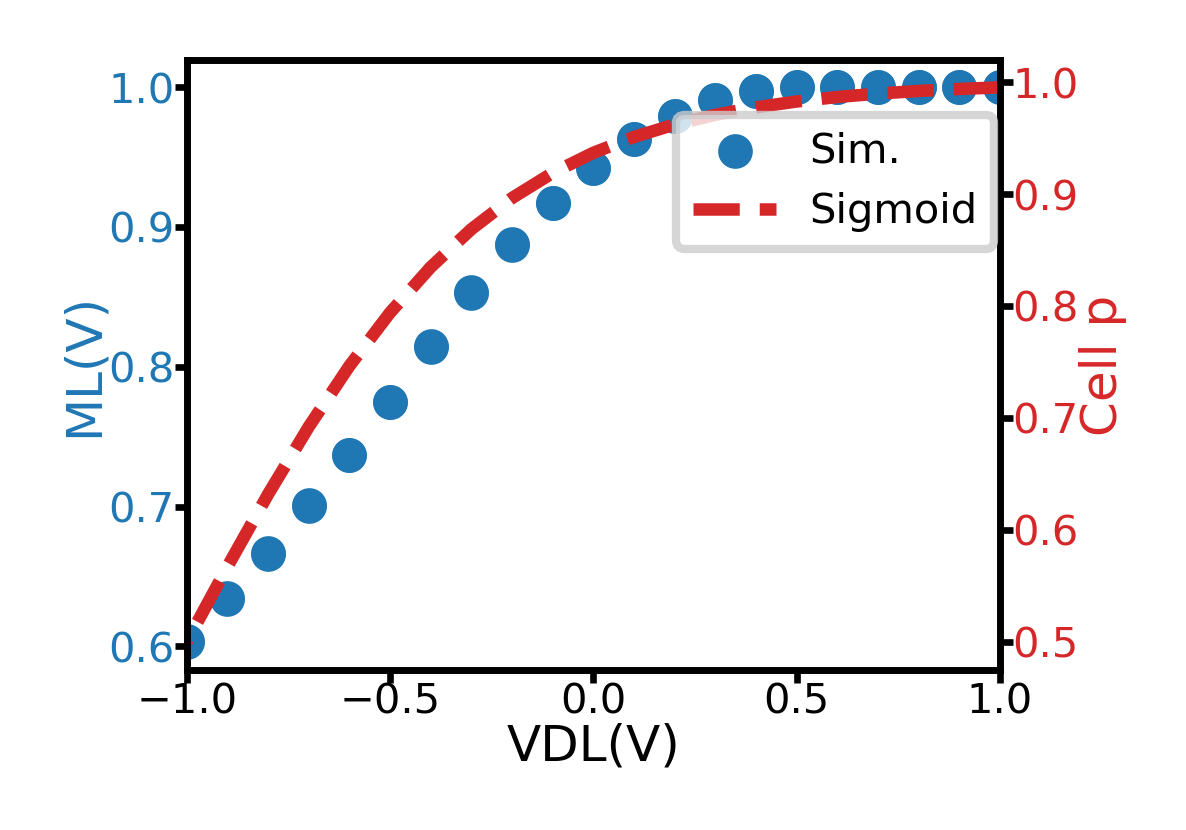

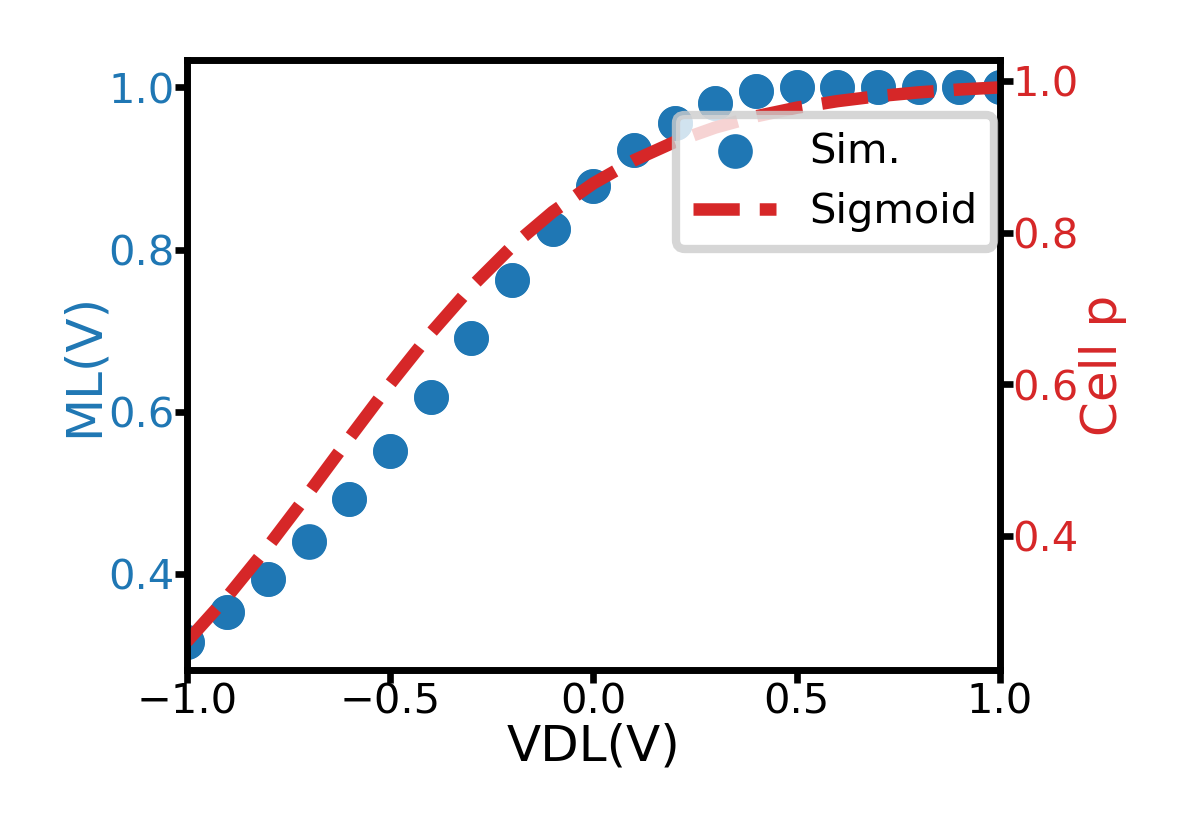

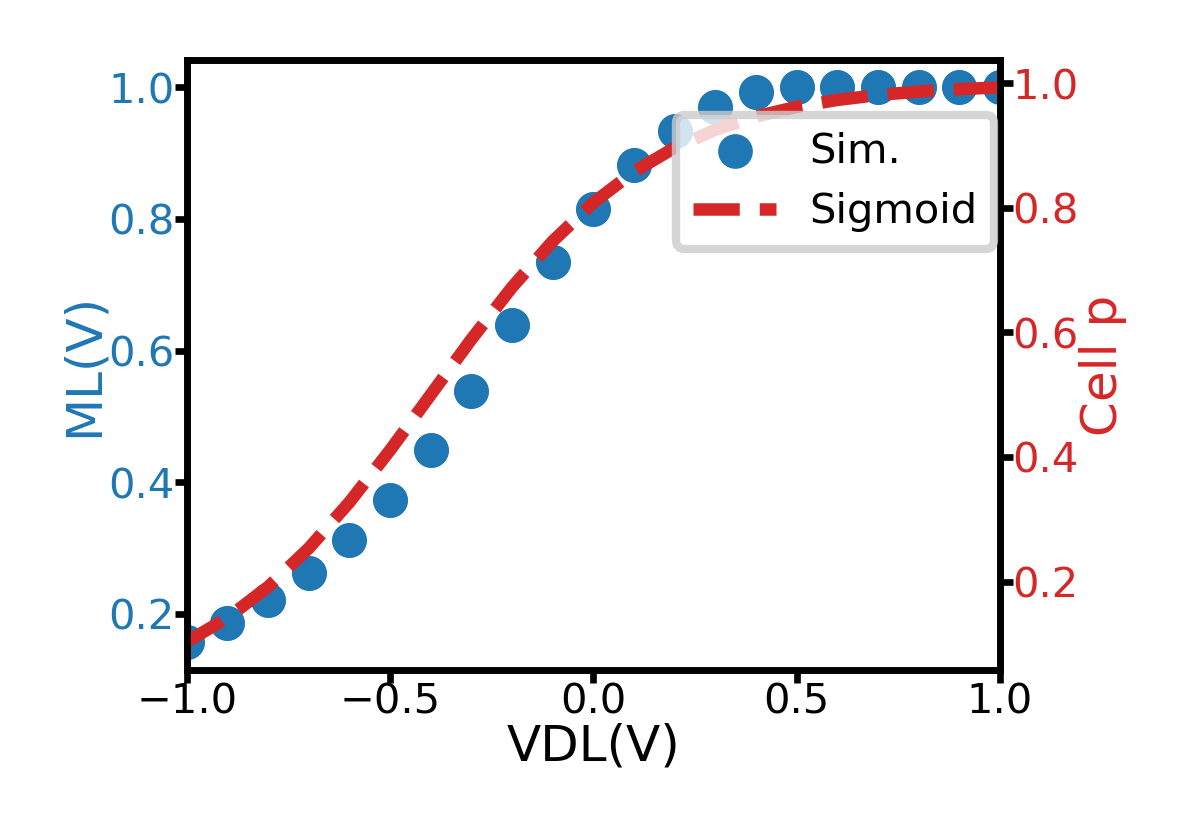

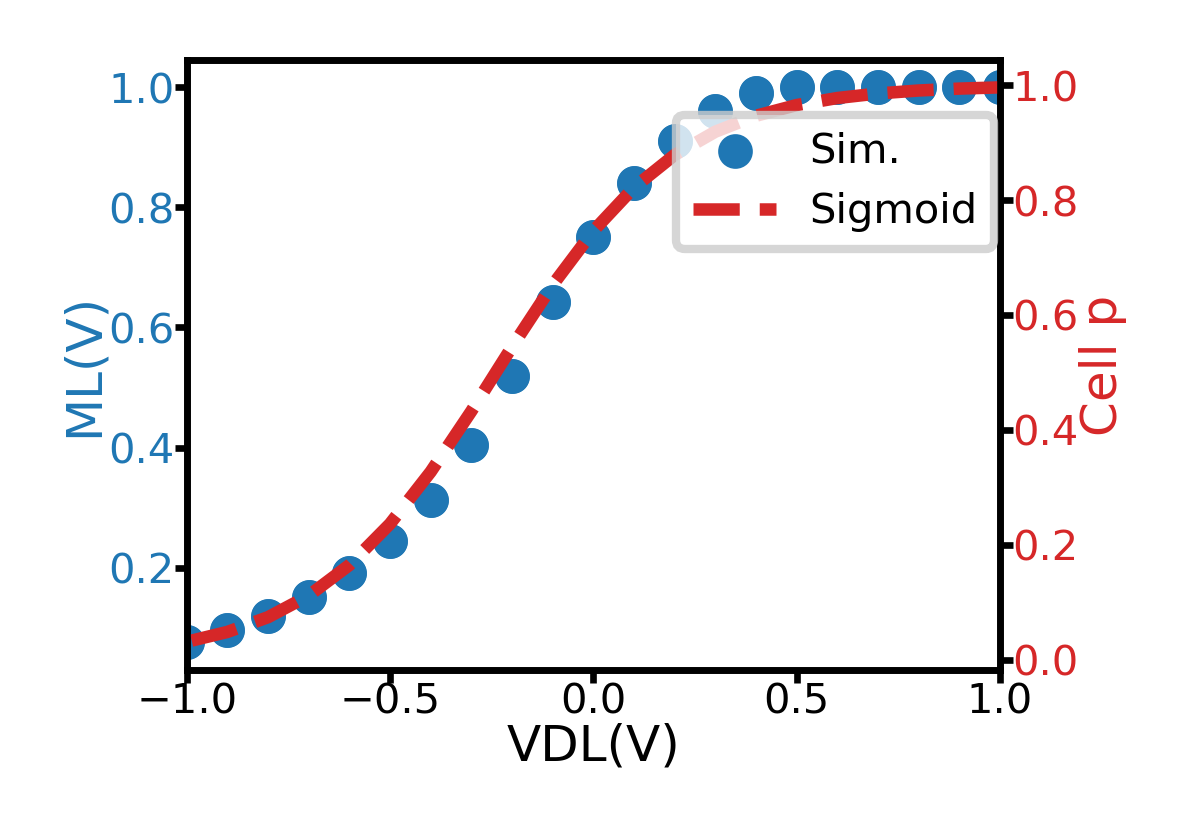

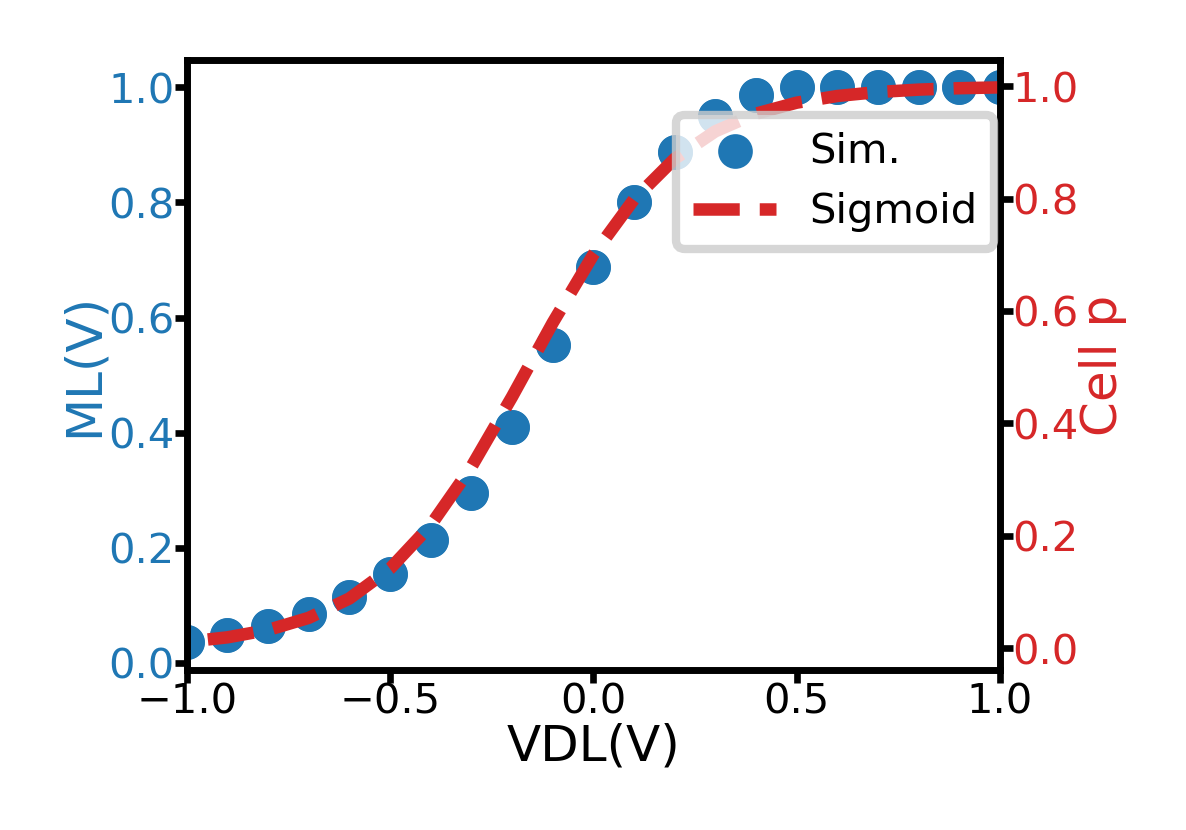

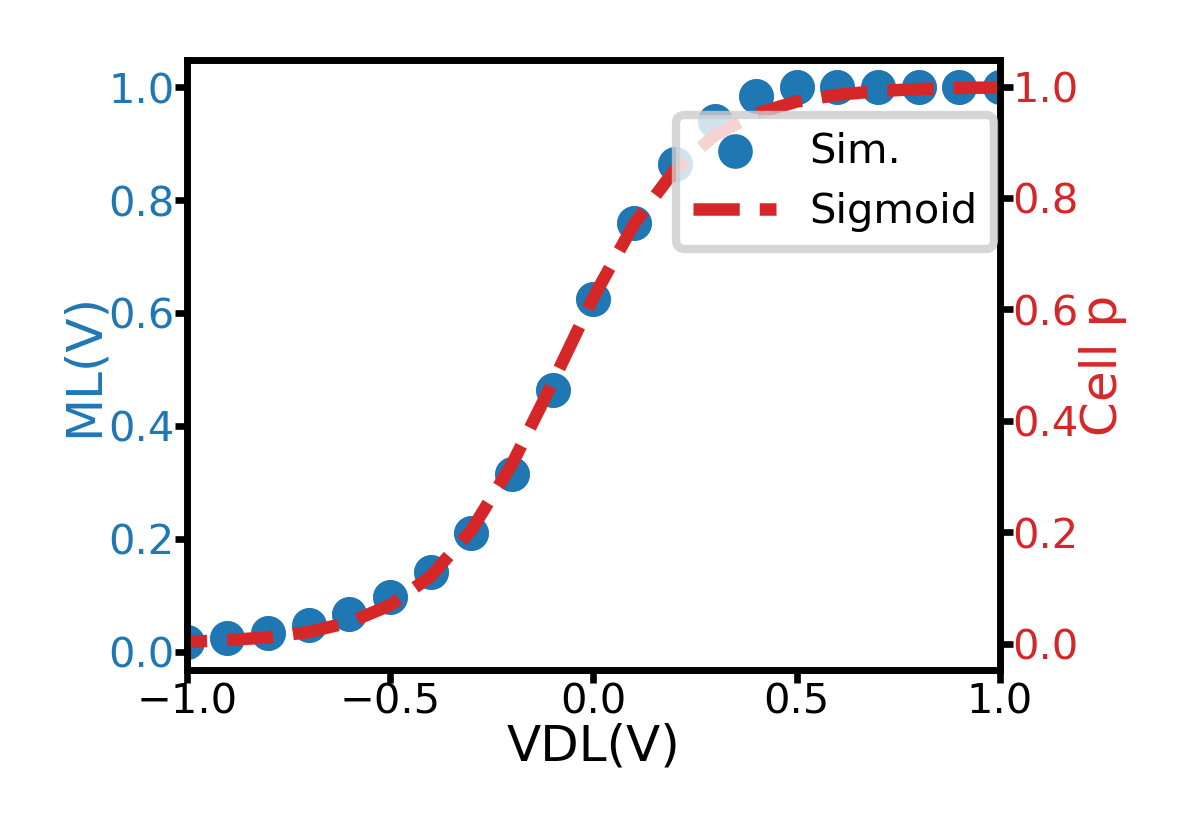

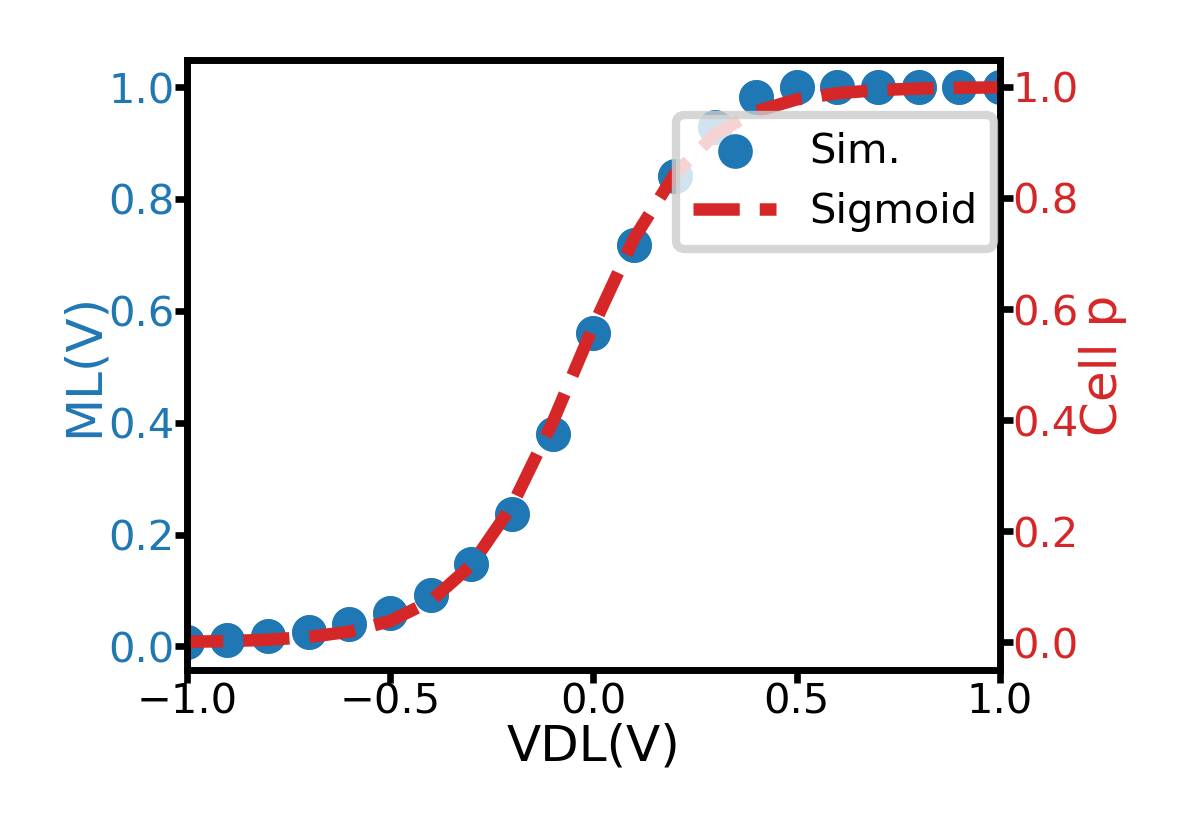

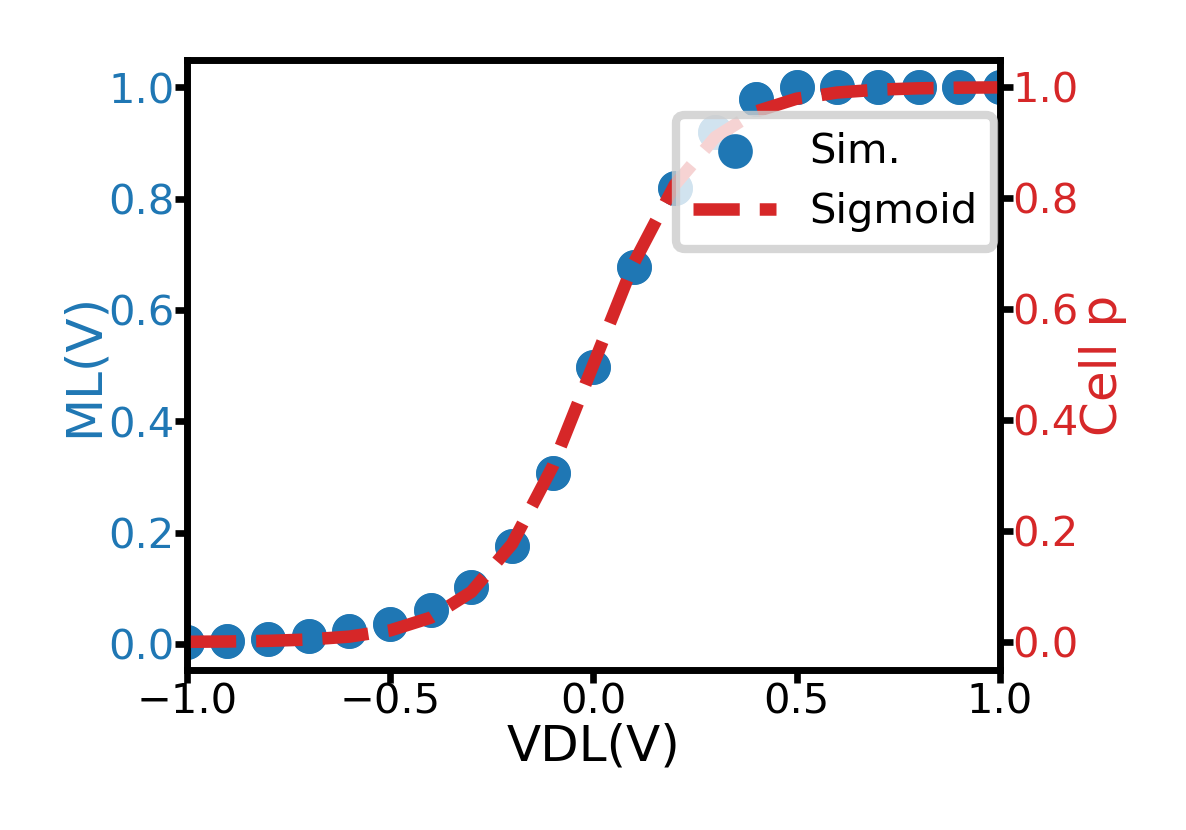

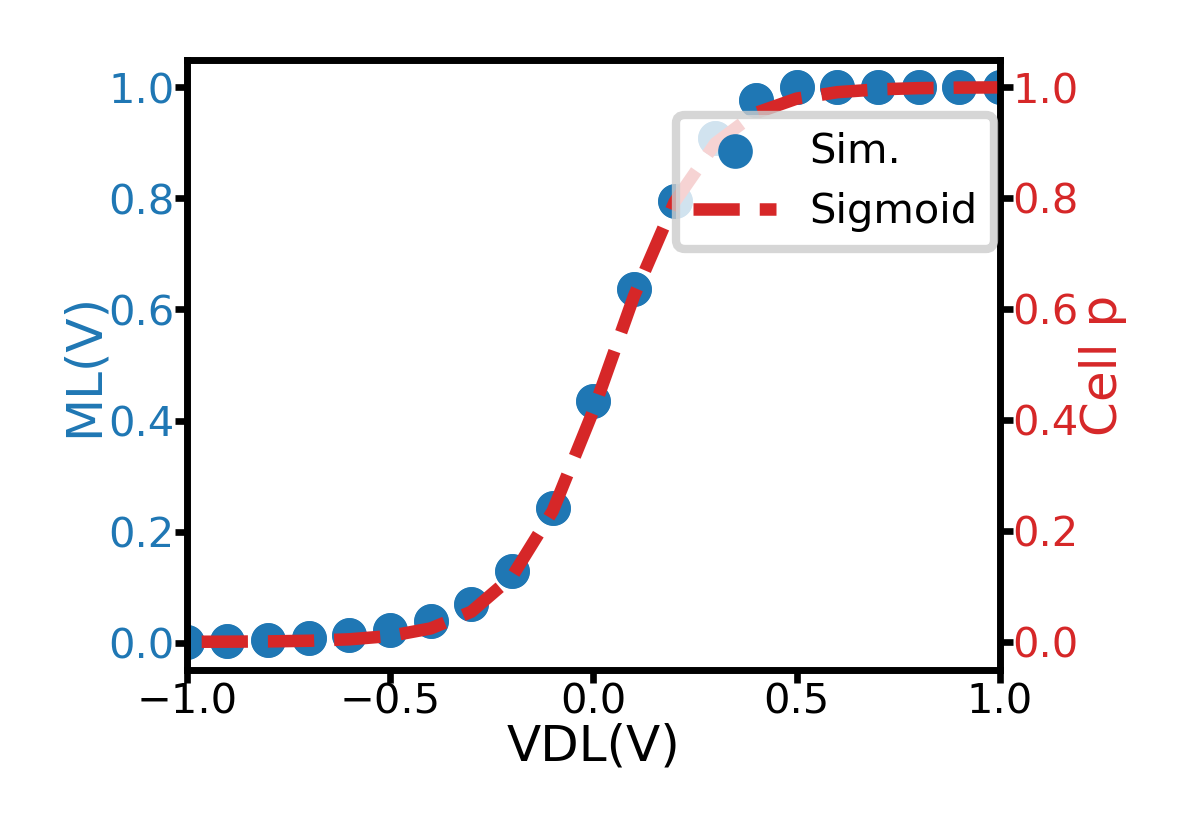

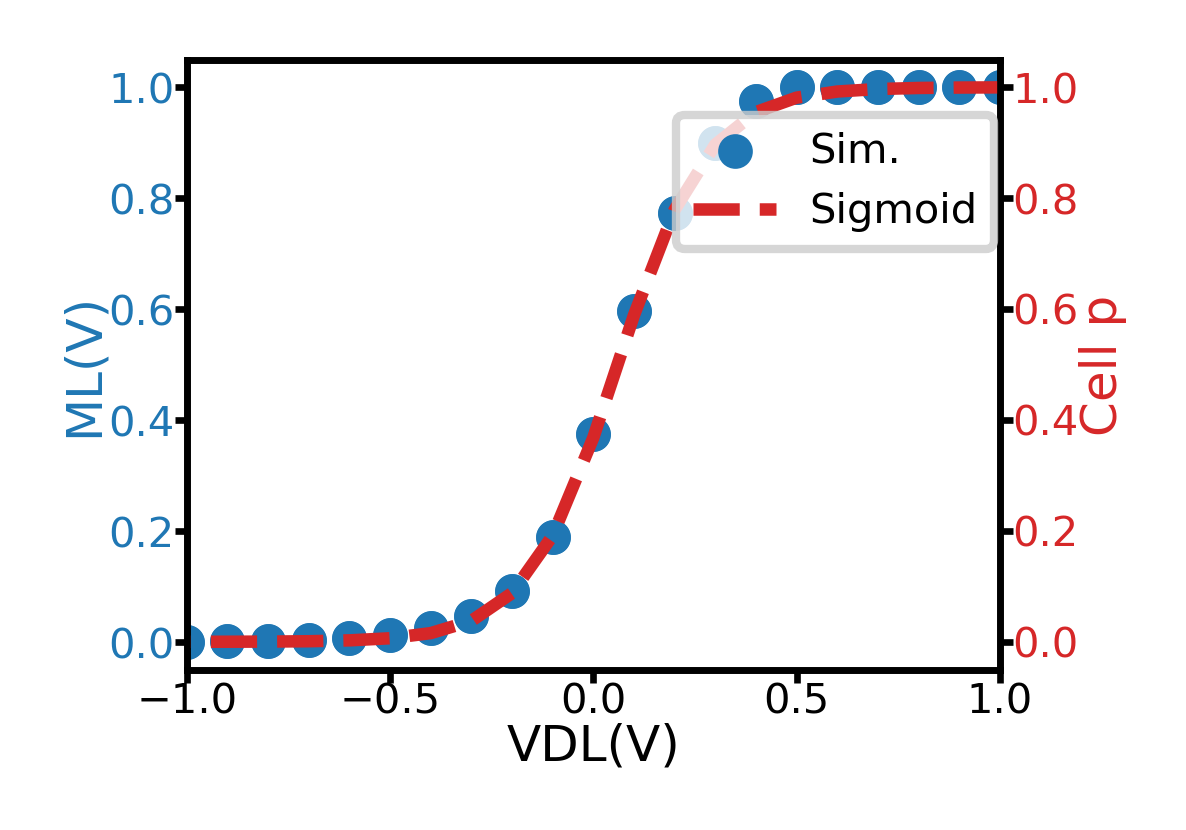

In [43]:
# plt.figure(dpi=200)
plt.rcParams["svg.fonttype"]='none'
plt.rcParams["font.family"]='Helvetica'
plt.rcParams["savefig.transparent"]=True
# fig, ax = plt.subplots(dpi=600,figsize=(1.76,1.32))
# fig, ax = plt.subplots(dpi=600,figsize=(2.28,1.71),layout='tight')
# ax.set_box_aspect(1.32/1.76)
error_all = []
for t_sample in np.arange(1,10.05,1):
    x = -ML_all[(ML_all['ML']==0)&((ML_all['time']-t_sample).abs()<0.001)]['input']
    y = ML_all[(ML_all['ML']==0)&((ML_all['time']-t_sample).abs()<0.001)]['ML(V)']
    # y = y[x>=0.25]
    # x = x[x>=0.25]
    # print(t_sample)
    y_fit,k,c,error = soft_boudary(x,y,0) #@t=5ms
    error_all.append([error,k,c,t_sample])
# plt.xlim([-1,1])

# plt.xlabel('Input(V)',fontsize=6,labelpad=0)
# plt.ylabel('ML(V)',fontsize=6,labelpad=0)
# plt.xticks([0,2,4,6],fontsize=5)
# plt.yticks([0,2,4],fontsize=5)
# ax.tick_params(axis='y', which='major', length=2,pad=0,labelsize=5)
# ax.tick_params(axis='x', which='major', length=2,pad=0.2,labelsize=5)

# y_fit = soft_boudary(x,y,0.5)
# plt.show()
# plt.savefig(fname="E:\The University Of Hong Kong\CANLab - WEN, Bo - WEN, Bo\soft tree images\cell fitting.svg",format='svg')


Text(0, 0.5, 'MSE')

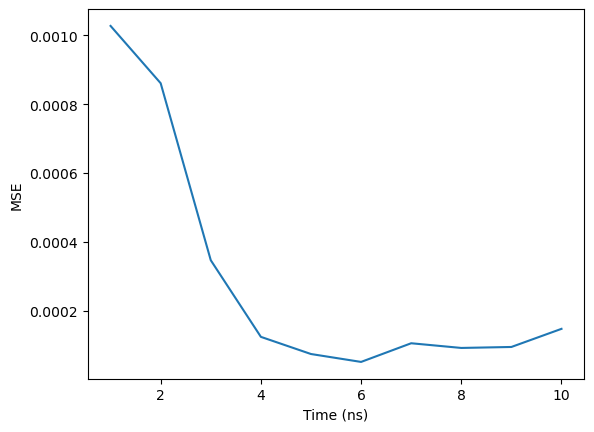

In [28]:
# plt.plot(np.arange(0.5,2.05,0.1),np.array(error_all)[:,0])
# plt.plot(np.arange(.5,5.05,0.5),np.array(error_all)[:,0])
plt.plot(np.arange(1,10.05,1),np.array(error_all)[:,0])
plt.xlabel('Time (ns)')
plt.ylabel('MSE')

In [29]:
def row_fitting(a,p,b,col_num=0):
    
    p_pro = 1
    p_sum = 0
    # b=1-a
    if col_num==0:
        for i in range(len(p)):
            p_pro = p_pro*p[i]
            p_sum = p_sum + p[i]
            P = a*p_pro+b*p_sum-b*(len(p)-1)
    else:
        if col_num>1:
                # for i in range(col_num):
                #     p_pro = p_pro*p
                #     p_sum = p_sum + p
                #     P = a*p_pro+b*p_sum-b*(col_num-1)
            p_pro = np.power(p,col_num)
            p_sum = col_num * p
            P = a*p_pro+b*p_sum-b*(col_num-1)

    
    P[P<=0]=0
    P[P>=1]=1
    
    return P
def func(x, a, b):
    return a * x + b

def row_fitting_plot(x,y,p,col_num=0,a_best=0,b_best=0):
    fig, ax = plt.subplots(dpi=600,figsize=(1.76,1.32))
    g = sns.scatterplot(x=x,y=y)
    
    # P_row = (y + 0.065)/0.875
    P_row = y
    # plt.plot(x,P_row)
    min_error = 100
    # b = 0
    # a = 0
    if a_best==0:
        if b_best==0:

            for a in np.arange(0, 1, 0.01):
                    # b = 1-a
                for b in np.arange(0,1,0.01):
                    y_fit = row_fitting(a,p,b,col_num)
                    error =  (y_fit-P_row).apply(lambda x: x**2).mean()
                    if error<min_error:
                        min_error = error
                        a_best = a
                        b_best = b

    # a_best = 1
    # b_best = 0
    y_fit = row_fitting(a_best,p,b_best,col_num)
    ax2 = plt.twinx()
    sns.lineplot(x=x,y=y_fit,ax=ax2)
    plt.ylabel('Row P')

    print([a_best,b_best])
    # plt.legend(['exp','fitting'])
    g.figure.legend(['sim','fitting'],loc=[0.7,0.2])
    # plt.xlim(-3.5,-2.0)
    # plt.text(-3.2,0.5,'a='+str(np.round(a_best,2)))
    plt.title('a='+str(np.round(a_best,2))+', b='+str(np.round(b_best,2)),)


    
    
    params, _ = curve_fit(func, P_row, y_fit)
    a, b = params[0], params[1]
    y_line_fit = func(P_row, a, b)

    plt.rcParams["svg.fonttype"]='none'
    plt.rcParams["font.family"]='Helvetica'
    plt.rcParams["savefig.transparent"]=False
    fig, ax = plt.subplots(dpi=600,figsize=(1.76,1.32))
    ax.set_box_aspect(1.32/1.76)
    
    ax.plot(P_row,y_line_fit,ls='--',color='r')
    ax.scatter(x=P_row,y=y_fit,s=10,alpha=0.8,edgecolor='none')
    # sns.scatterplot(x=P_row,y=y_fit)
    r = np.corrcoef(y_fit,P_row)
    rmse = np.sqrt((y_fit-P_row).apply(lambda x: x**2).mean())
    print('rmse=',rmse)
    print('r2=',r[0,1]**2)

    plt.ylabel('Predicted P',fontsize=6,labelpad=0)
    plt.xlabel('Simulation P',fontsize=6,labelpad=0)
    ax.tick_params(axis='y', which='major', length=2,pad=0,labelsize=5)
    ax.tick_params(axis='x', which='major', length=2,pad=0.2,labelsize=5)
    plt.text(0.1,0.9,'$r^2$='+str(np.round(r[0,1]**2,3)),fontsize=5)
    plt.text(0.1,0.8,'RMSE='+str(np.round(rmse,2)),fontsize=5)
    return rmse,r[0,1]**2

In [30]:
Cols_Num

8

[0.81, 0.73]
rmse= 0.01677657344869922
r2= 0.9987257522785987
[0.72, 0.8]
rmse= 0.007761214448057901
r2= 0.9997240800372611
[0.41000000000000003, 0.91]
rmse= 0.008537857104919347
r2= 0.9996459192040182
[0.26, 0.99]
rmse= 0.005562646246983236
r2= 0.9998498986464065
[0.21, 0.99]
rmse= 0.00988364193636304
r2= 0.9995248024004072
[0.17, 0.99]
rmse= 0.01200572640001887
r2= 0.999306542595756
[0.09, 0.99]
rmse= 0.023354959899173713
r2= 0.9973600976282462
[0.16, 0.99]
rmse= 0.011044404827514533
r2= 0.9993976743334846
[0.13, 0.99]
rmse= 0.015213698984618258
r2= 0.9988607317370174
[0.14, 0.99]
rmse= 0.012412138300812977
r2= 0.9992452253299974


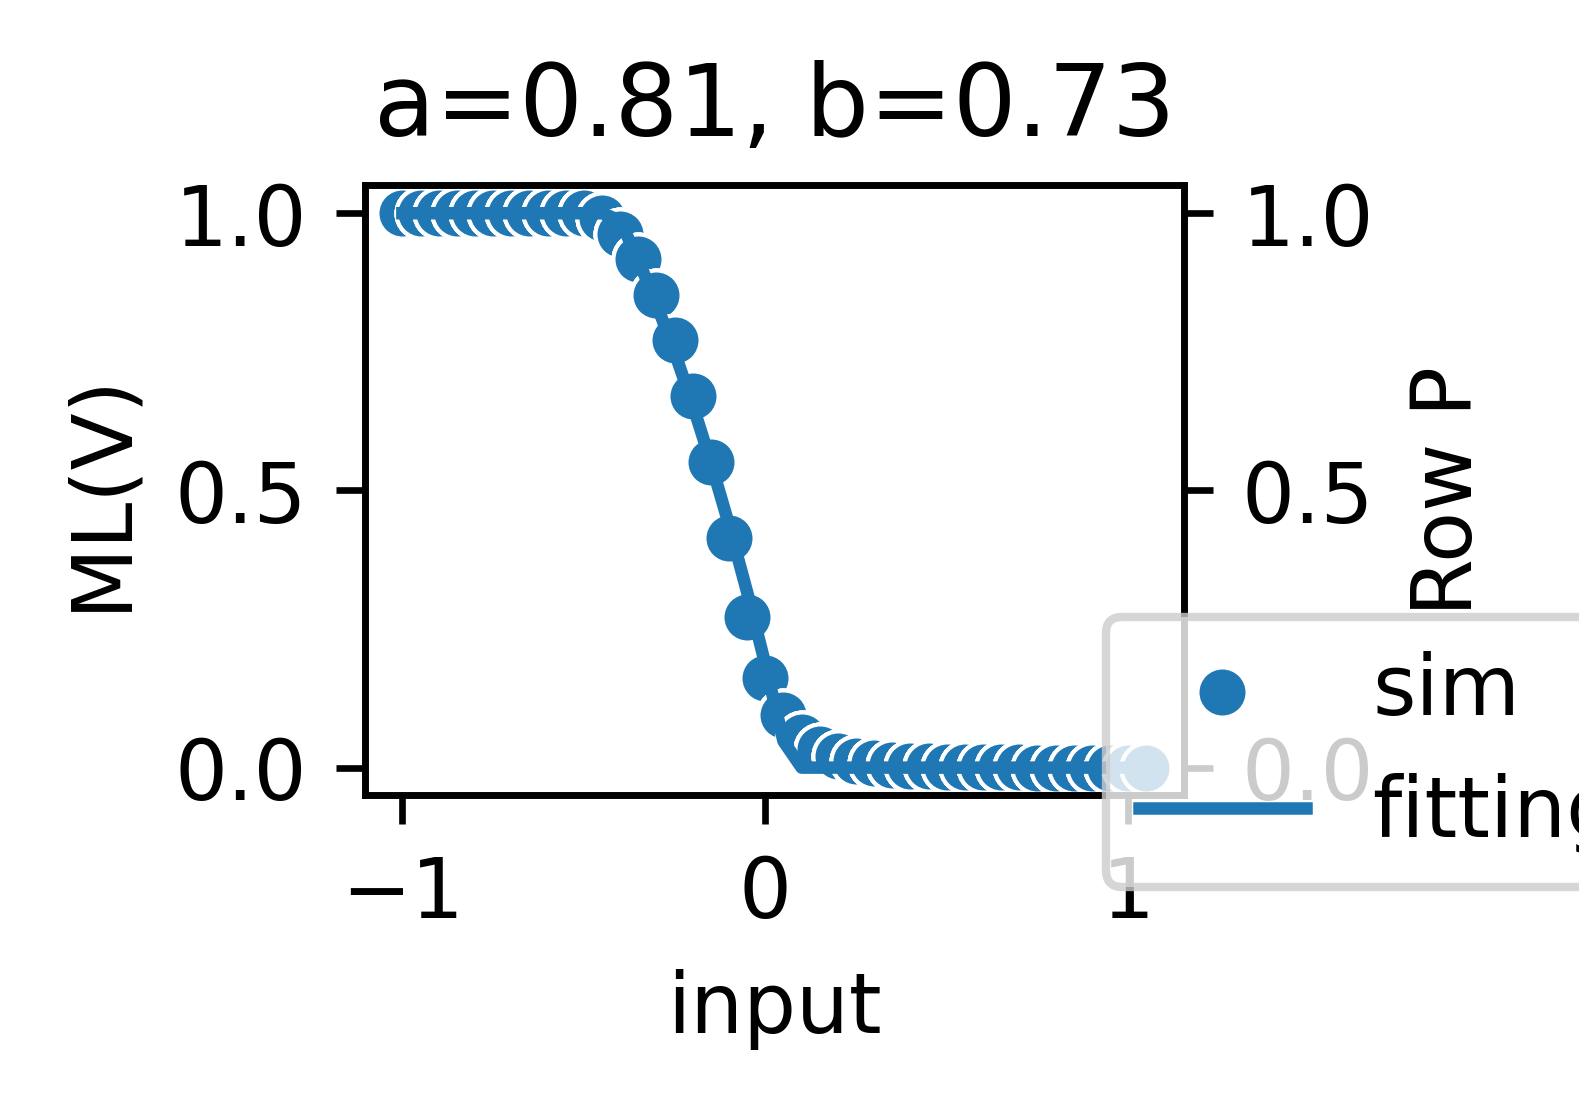

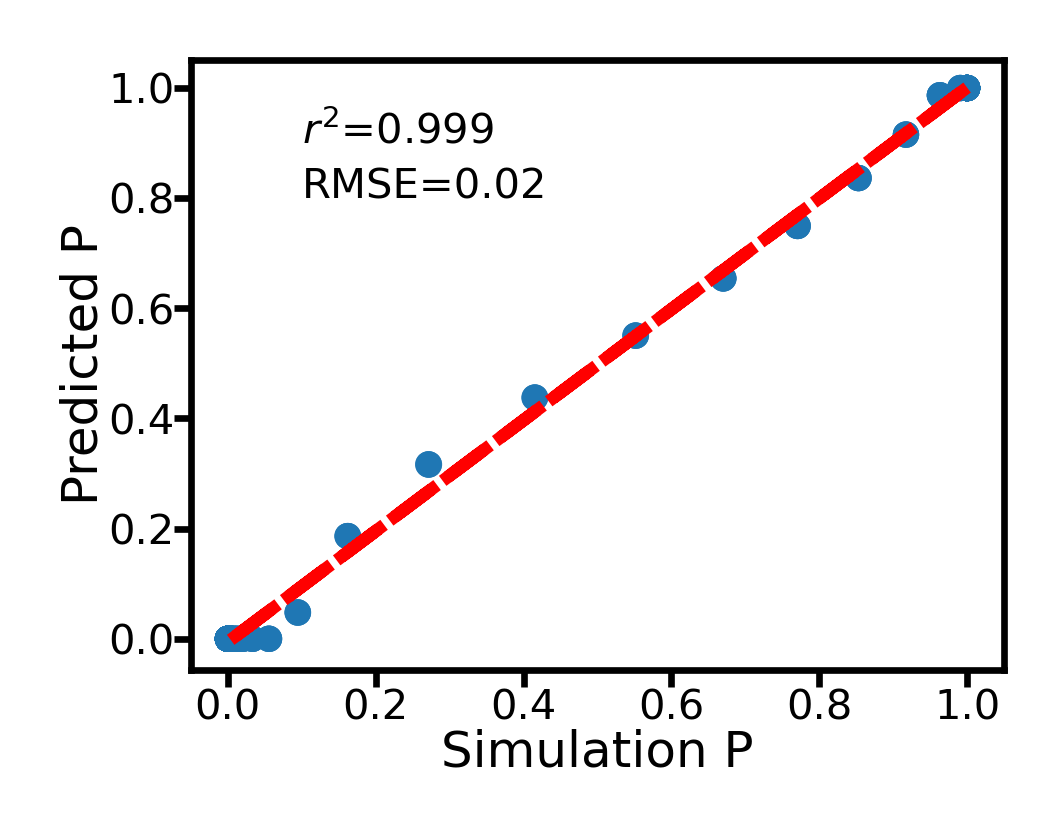

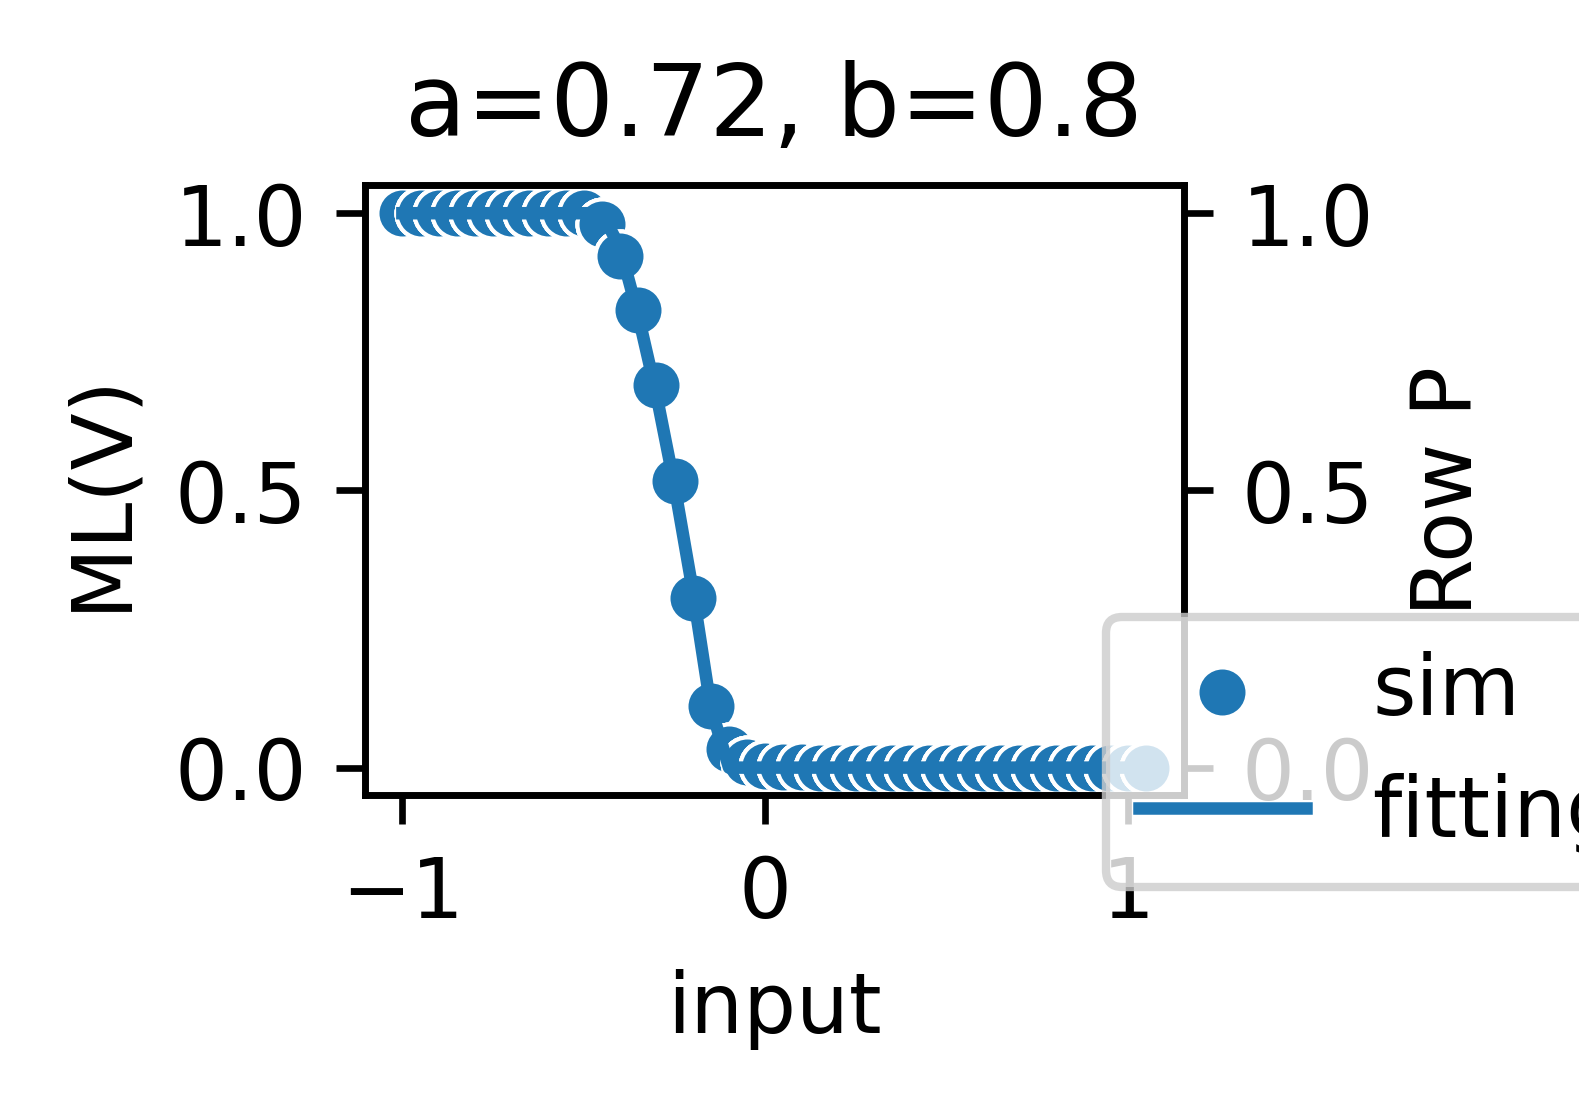

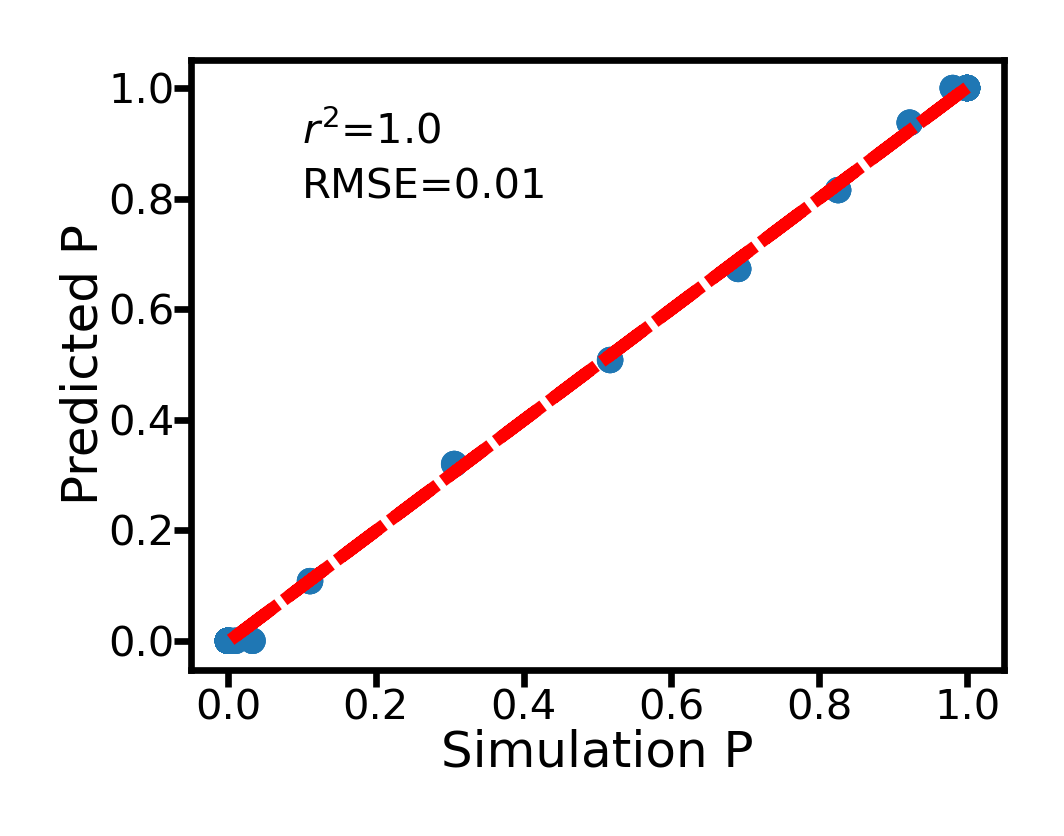

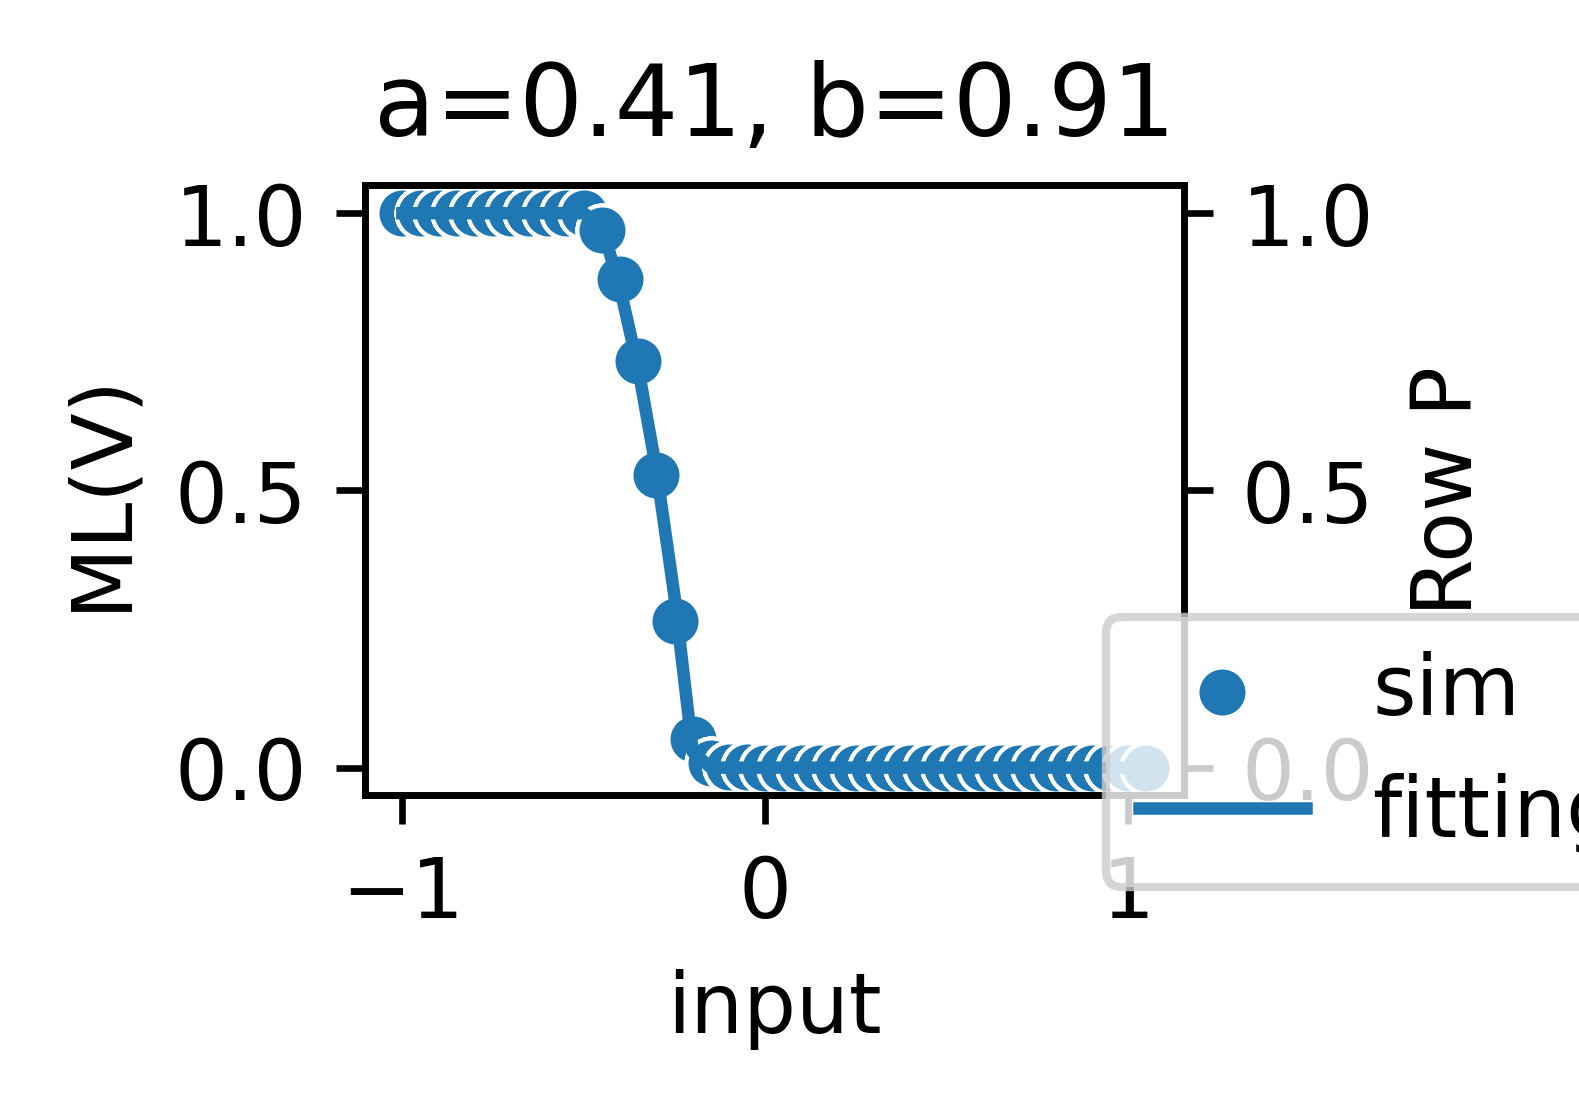

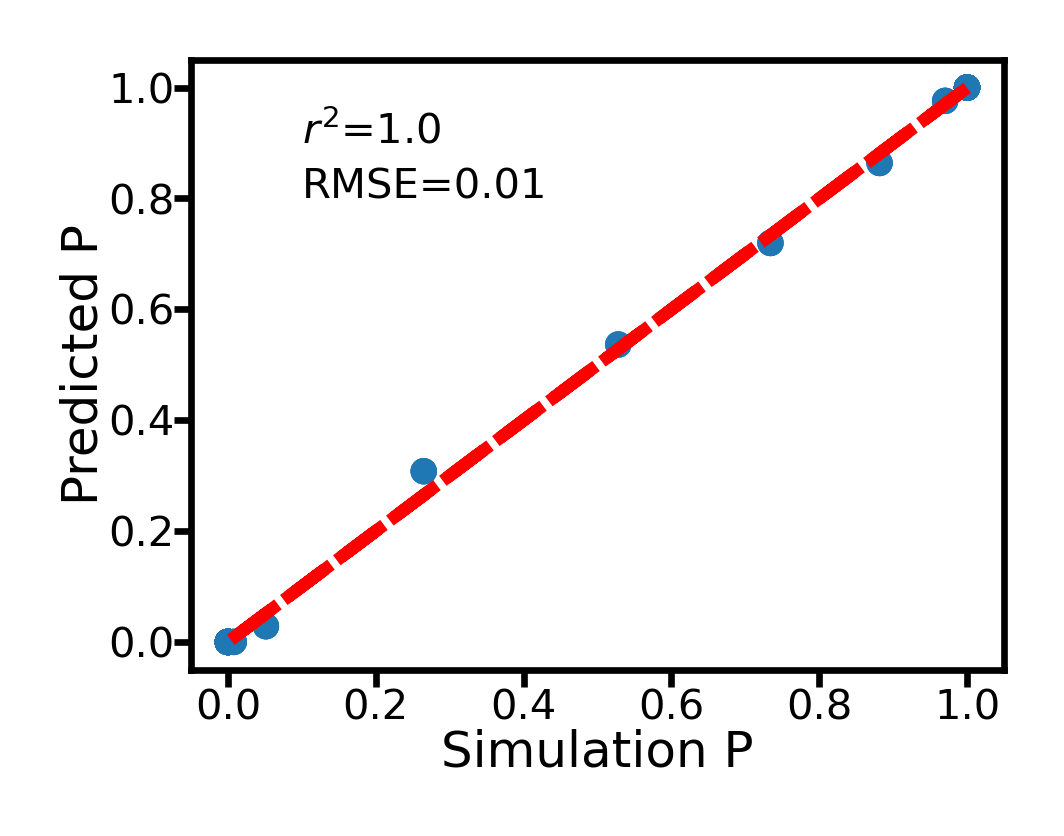

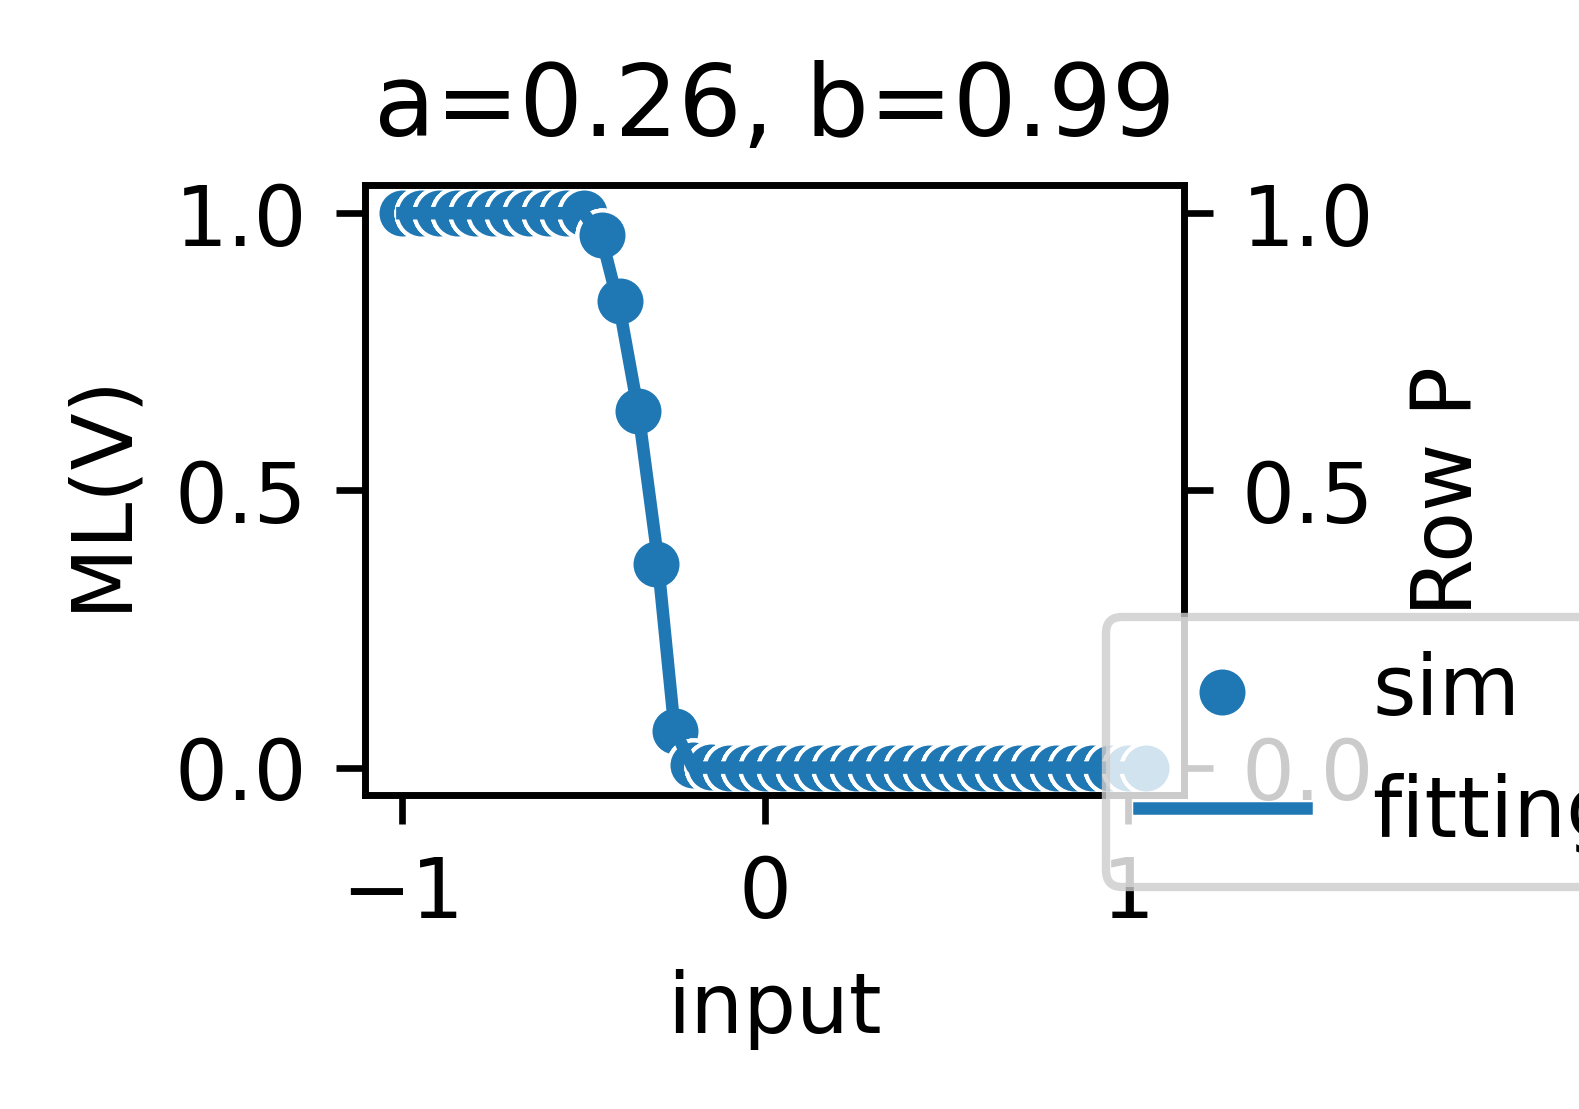

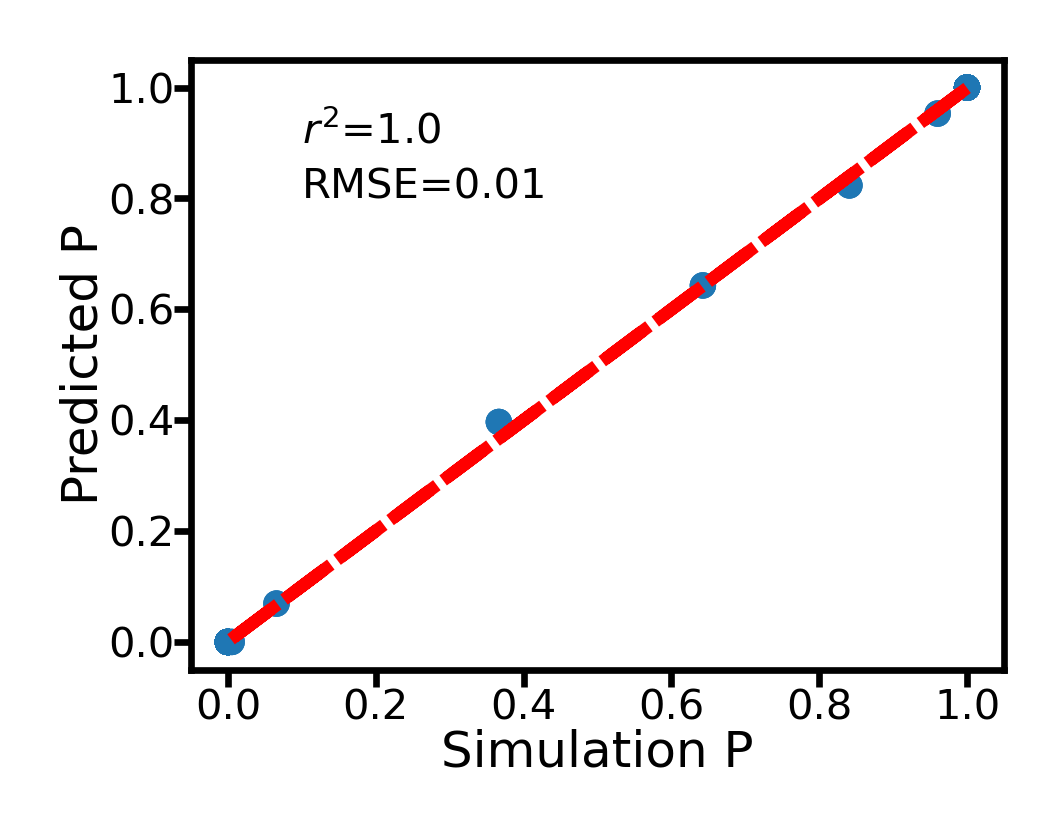

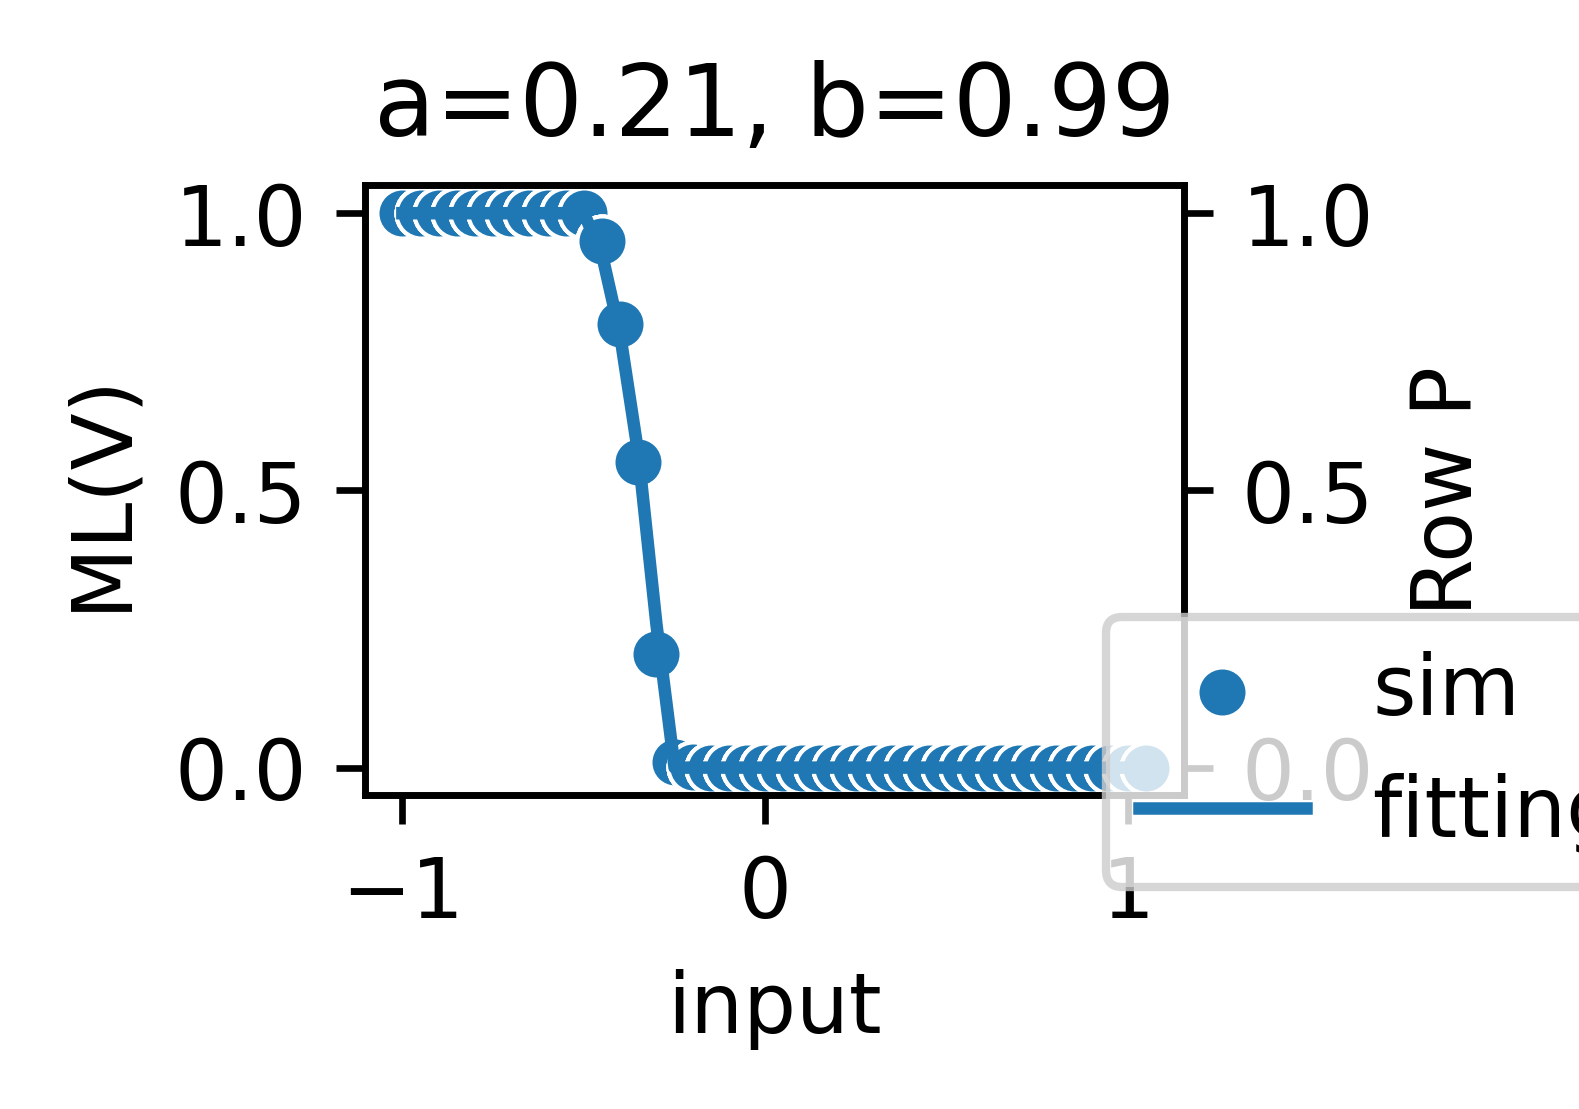

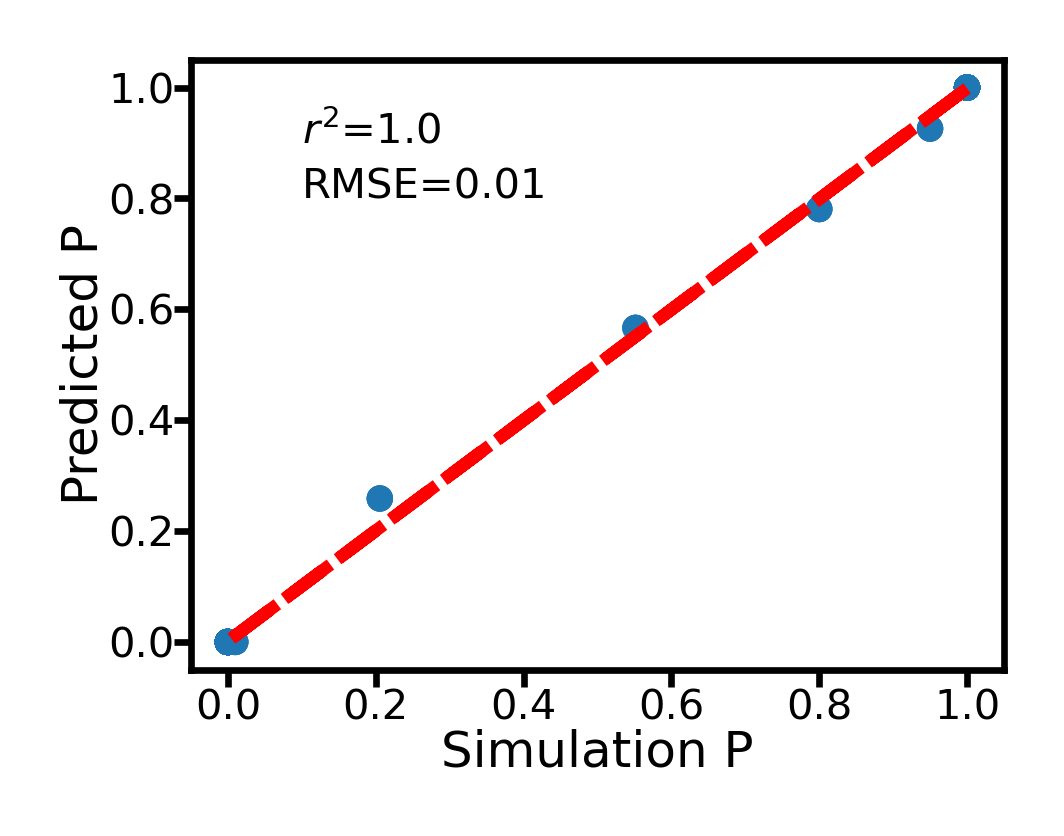

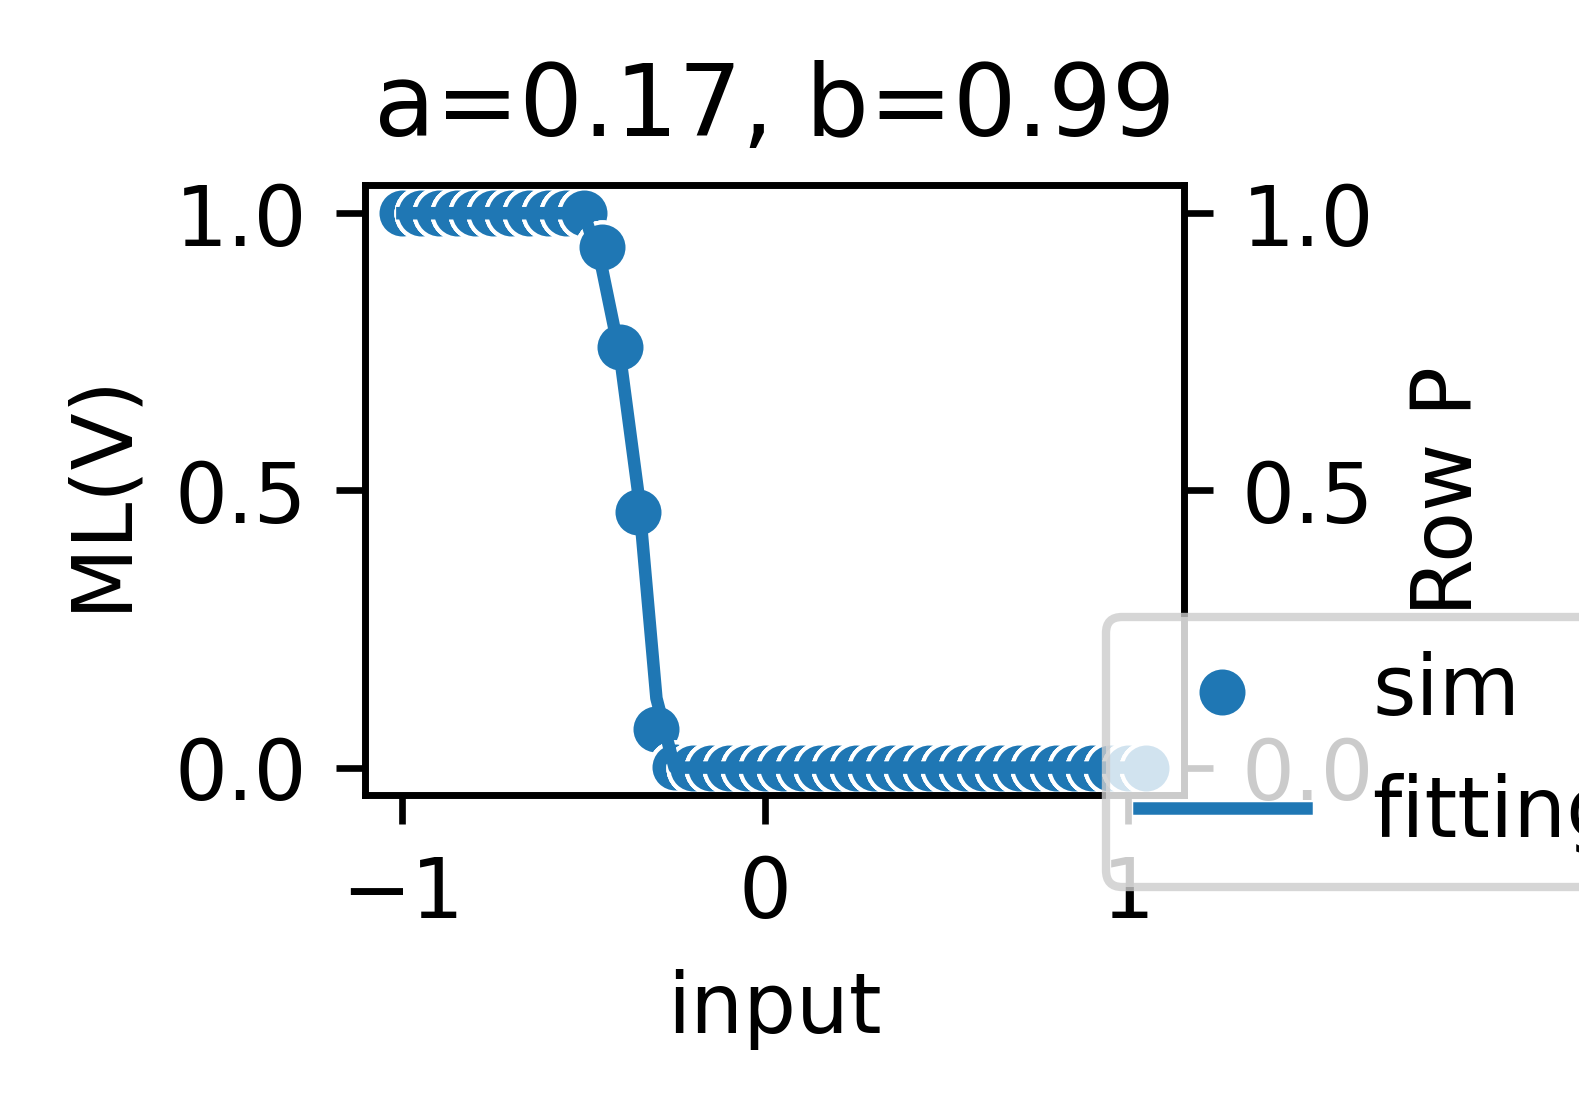

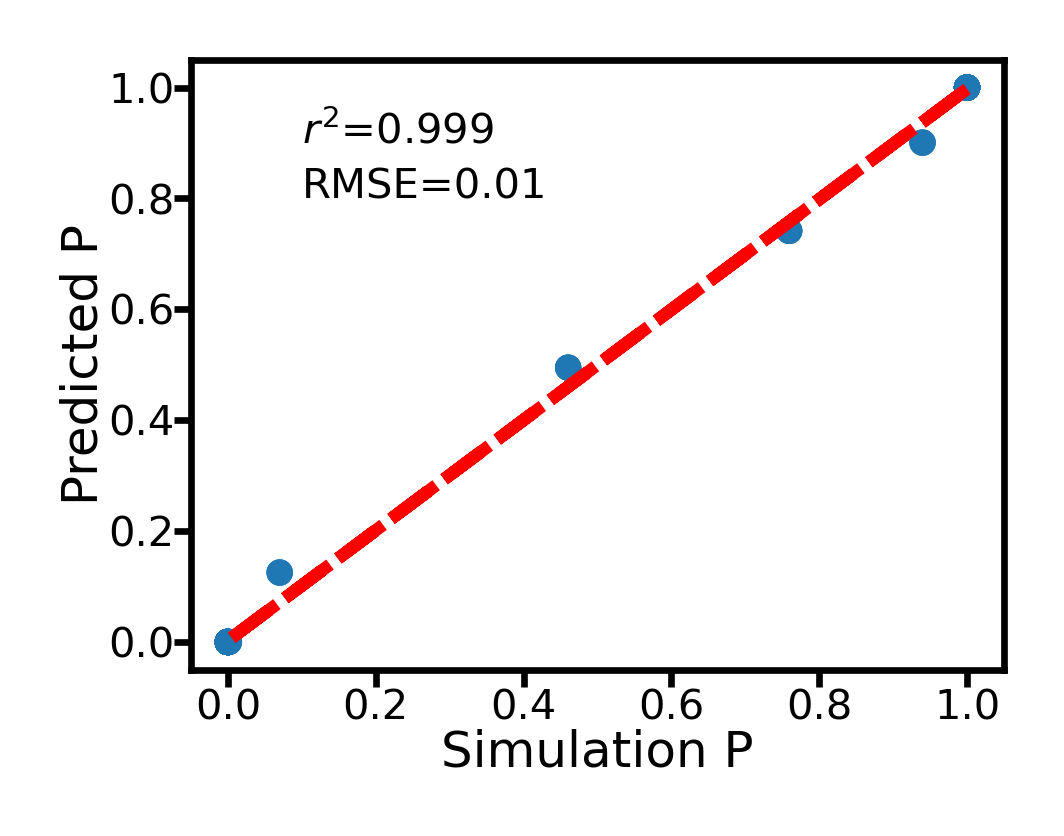

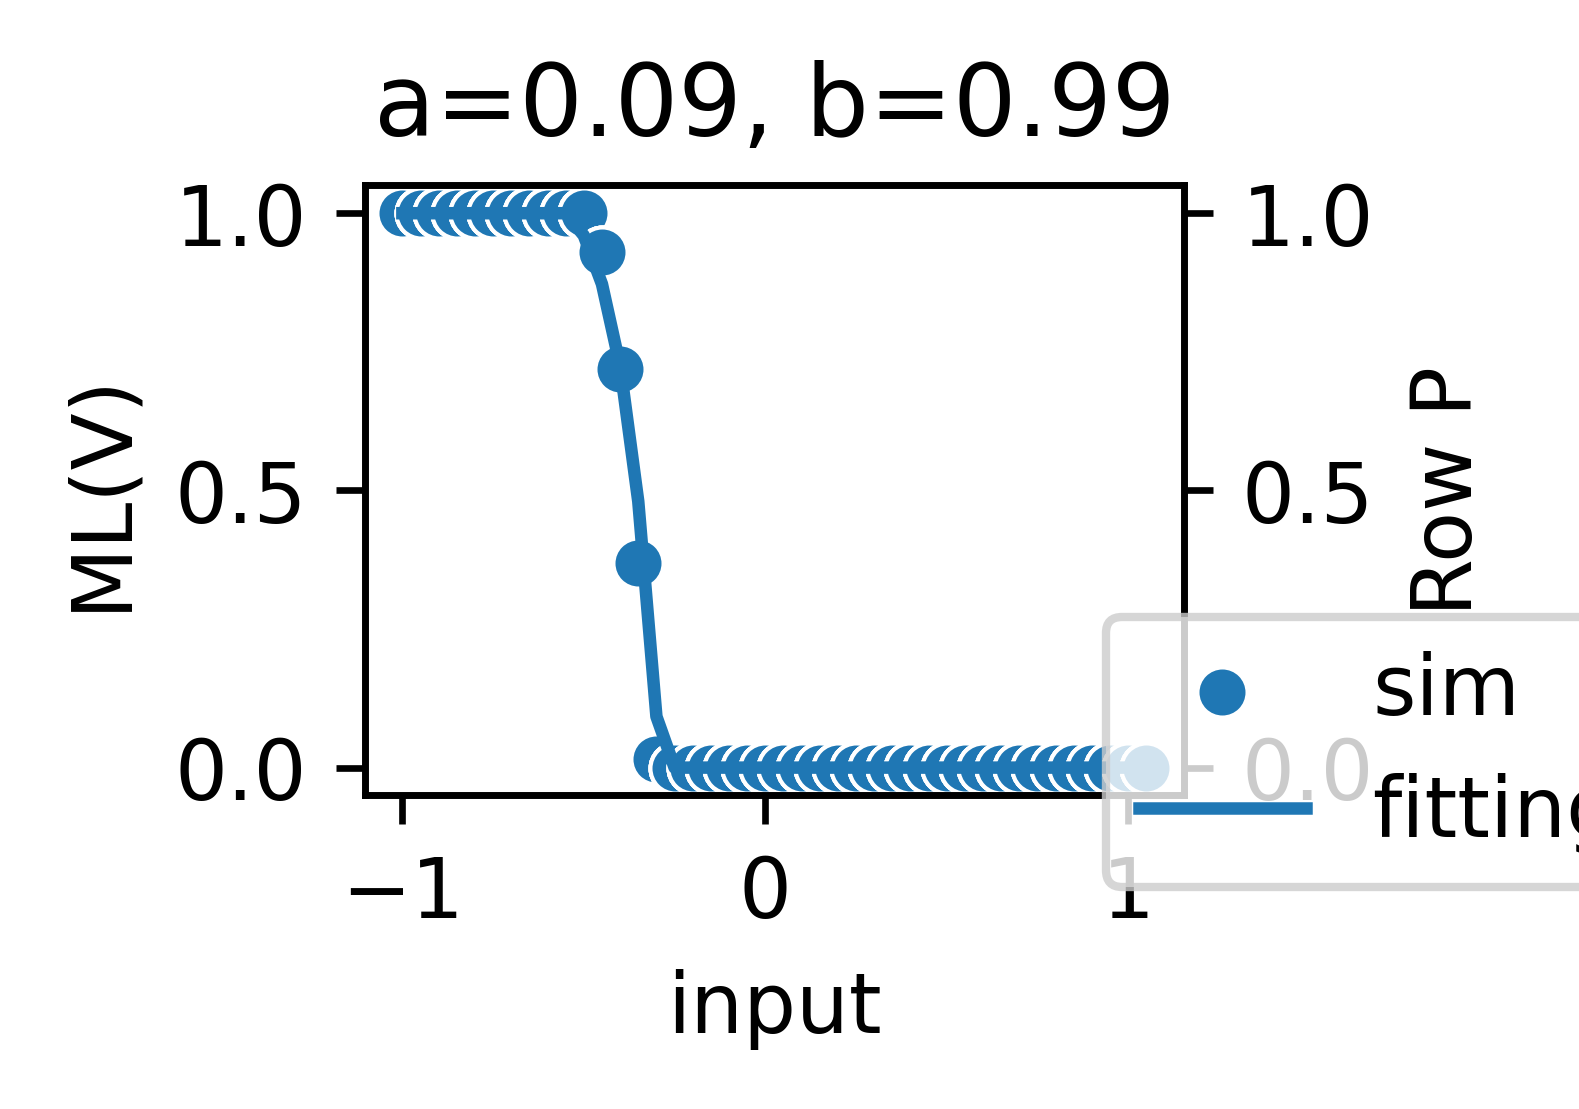

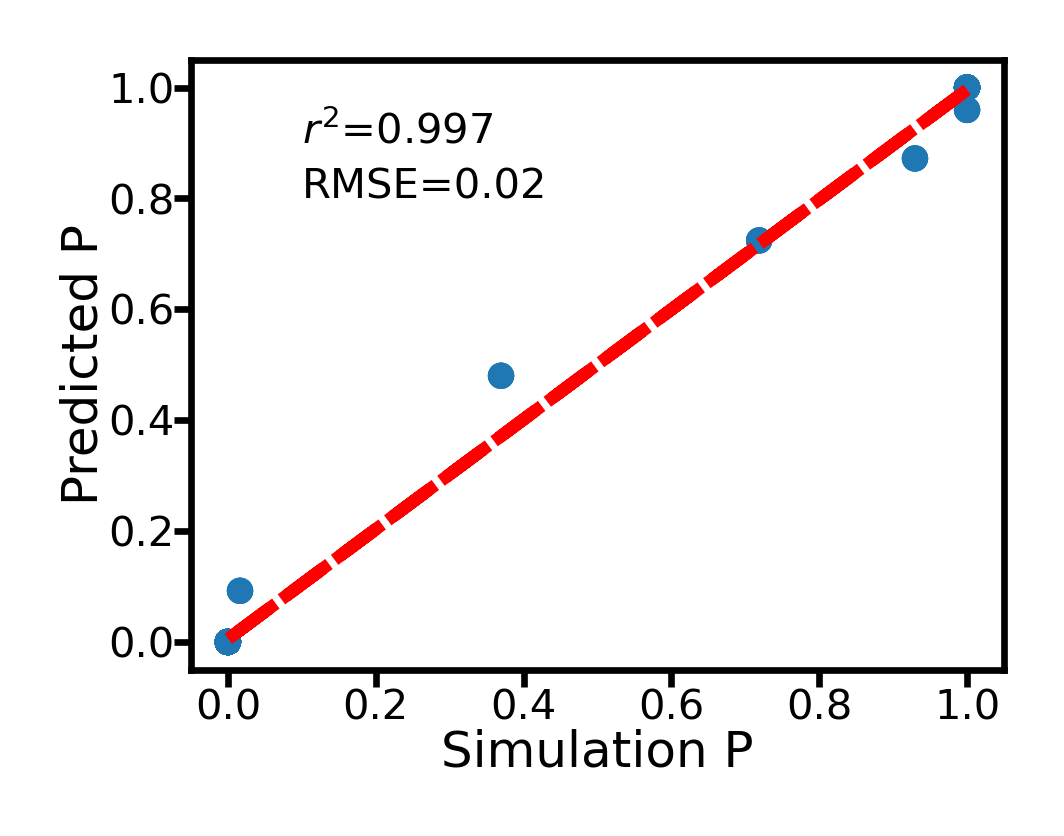

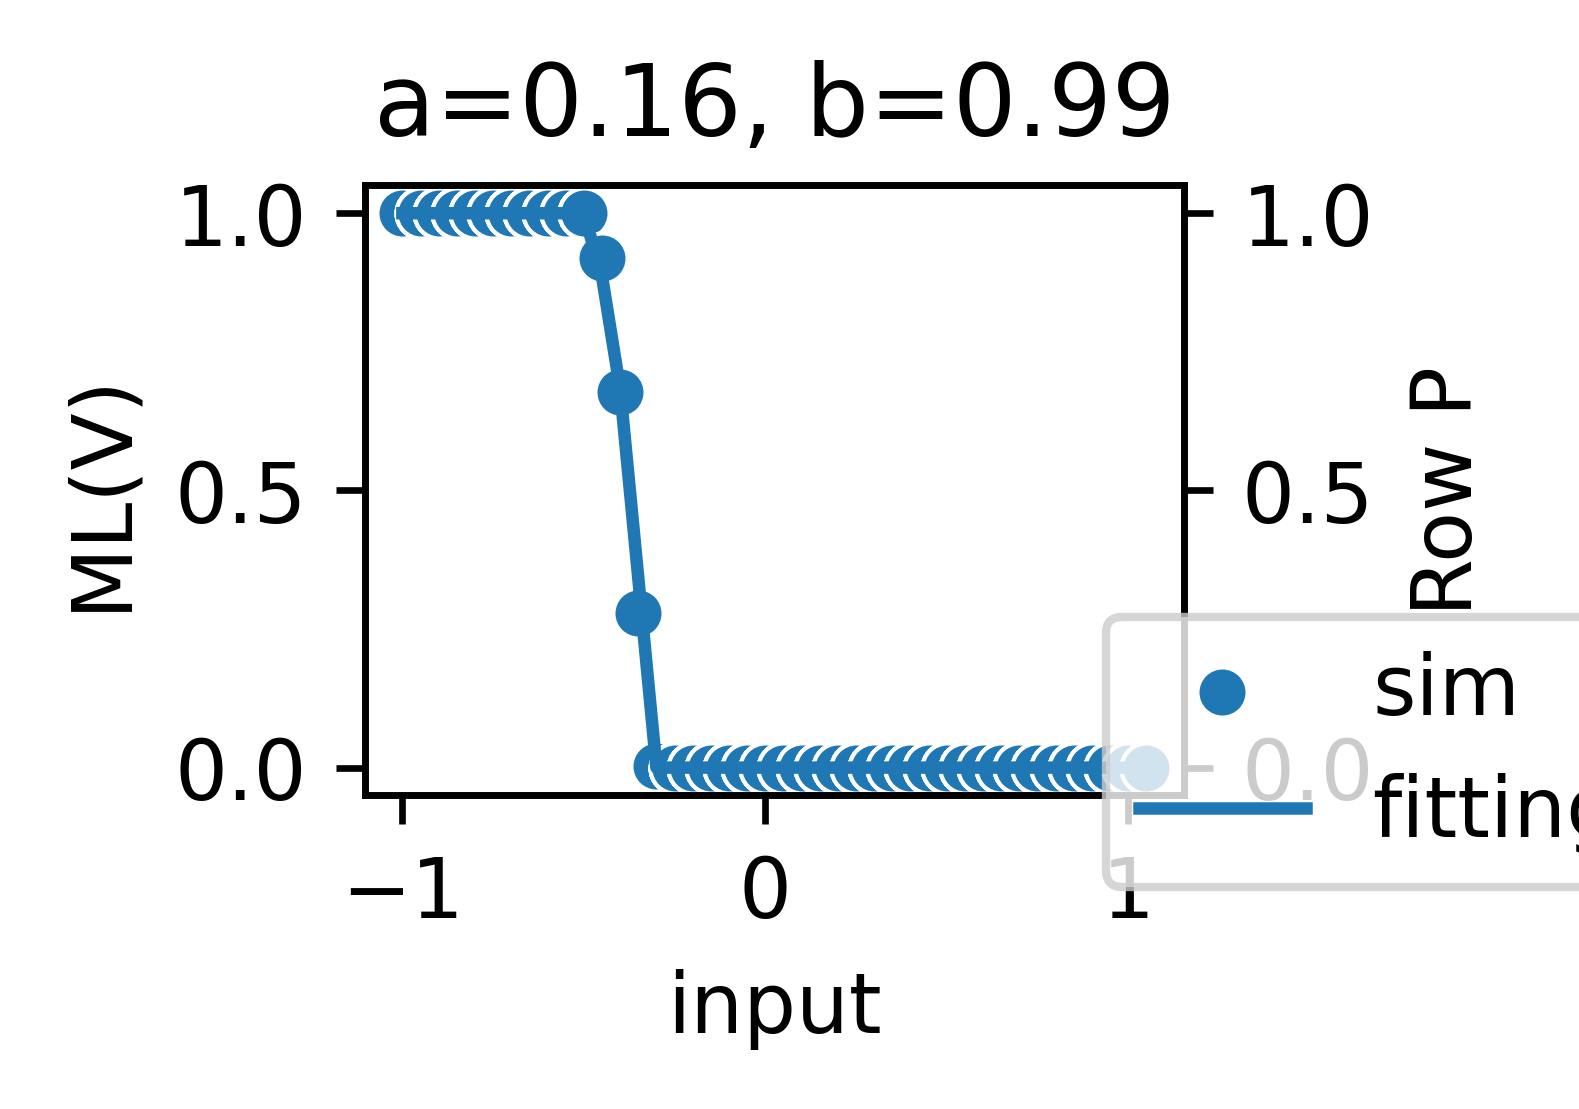

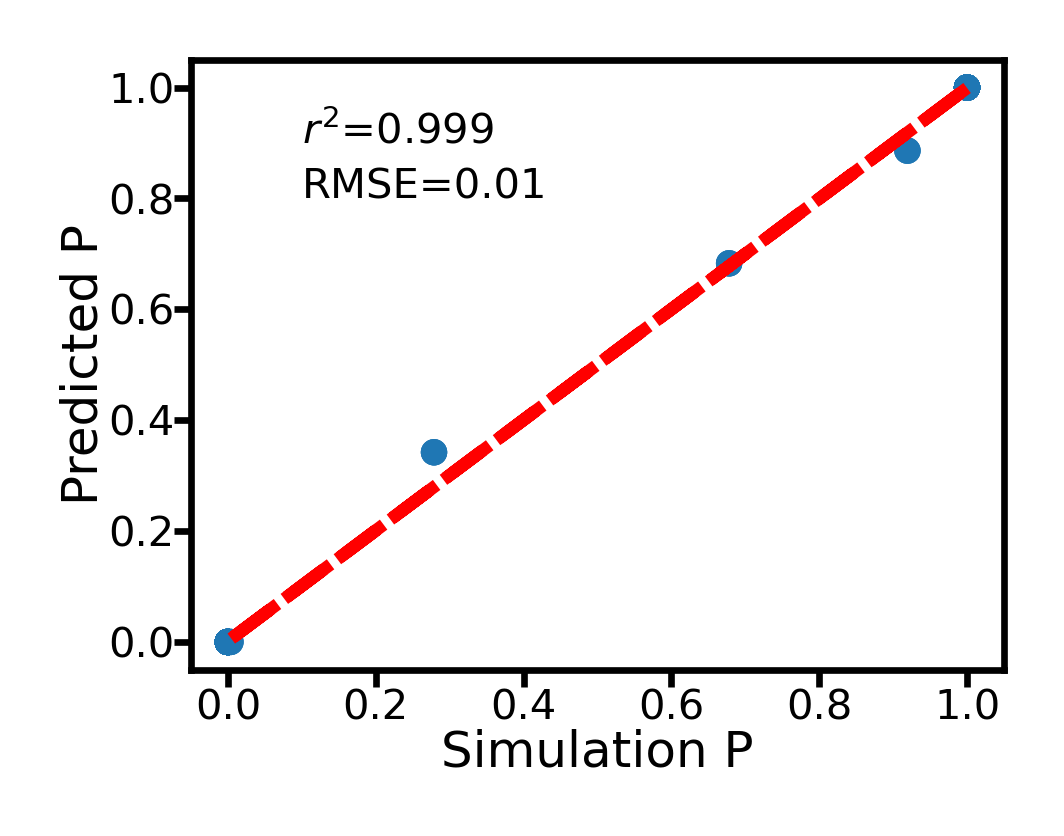

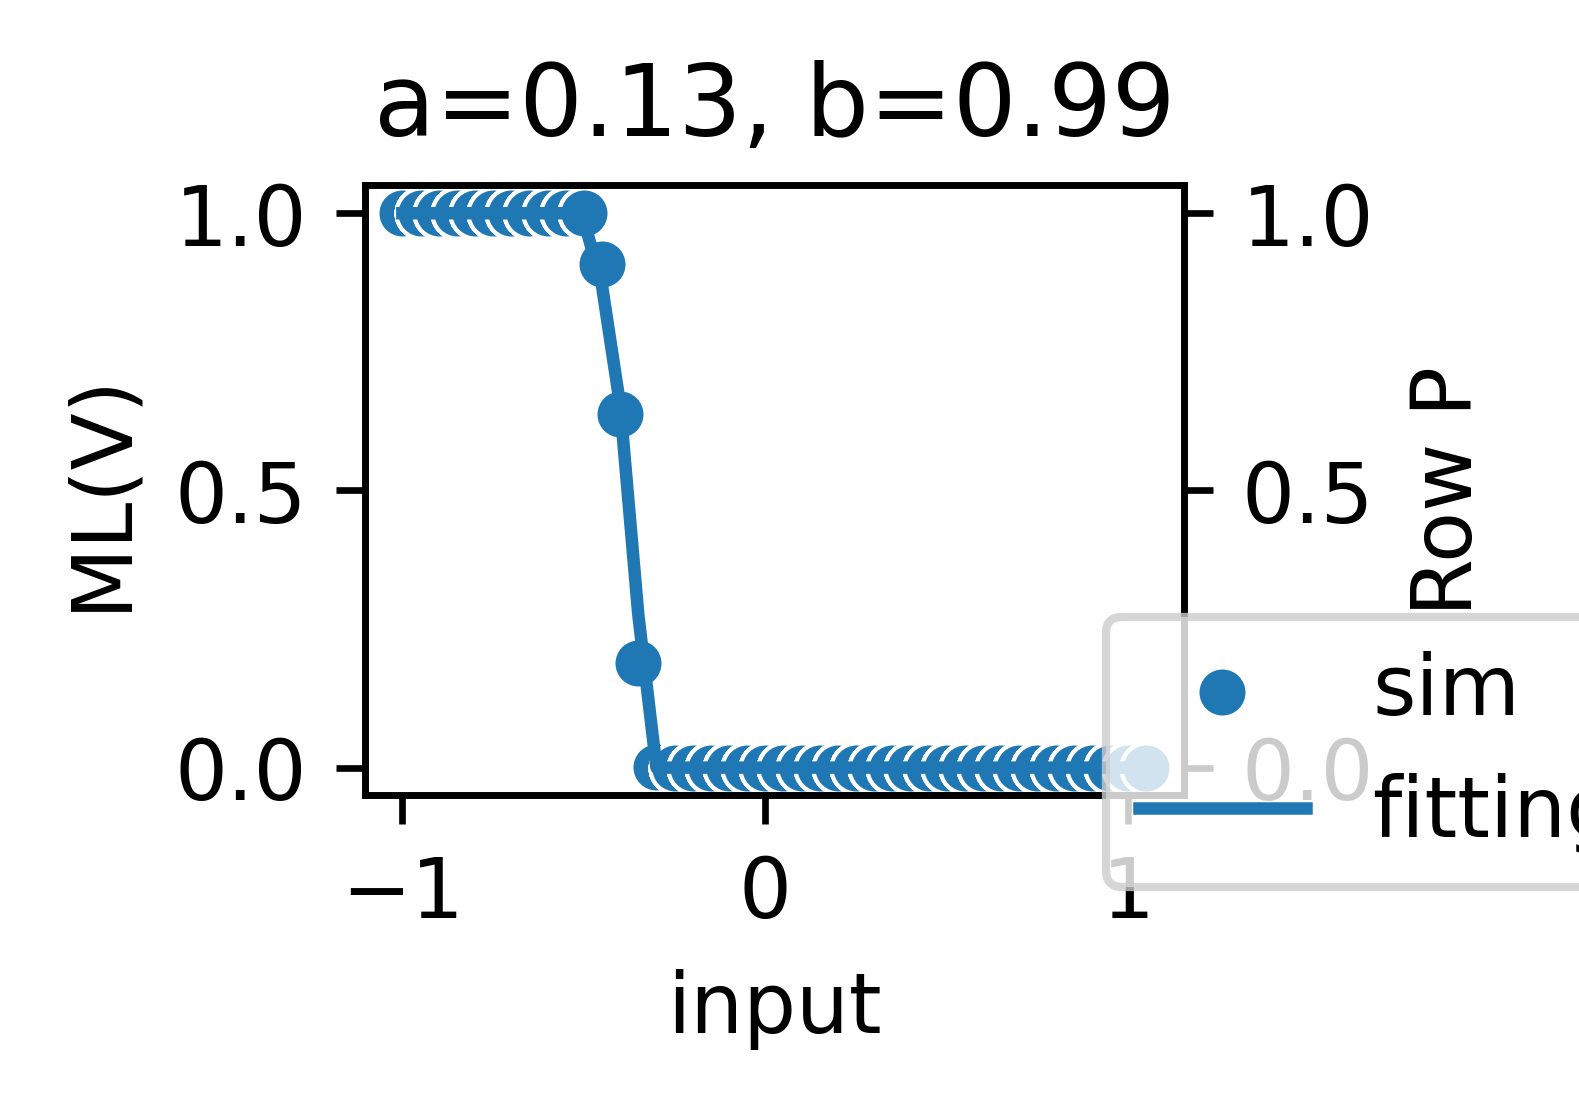

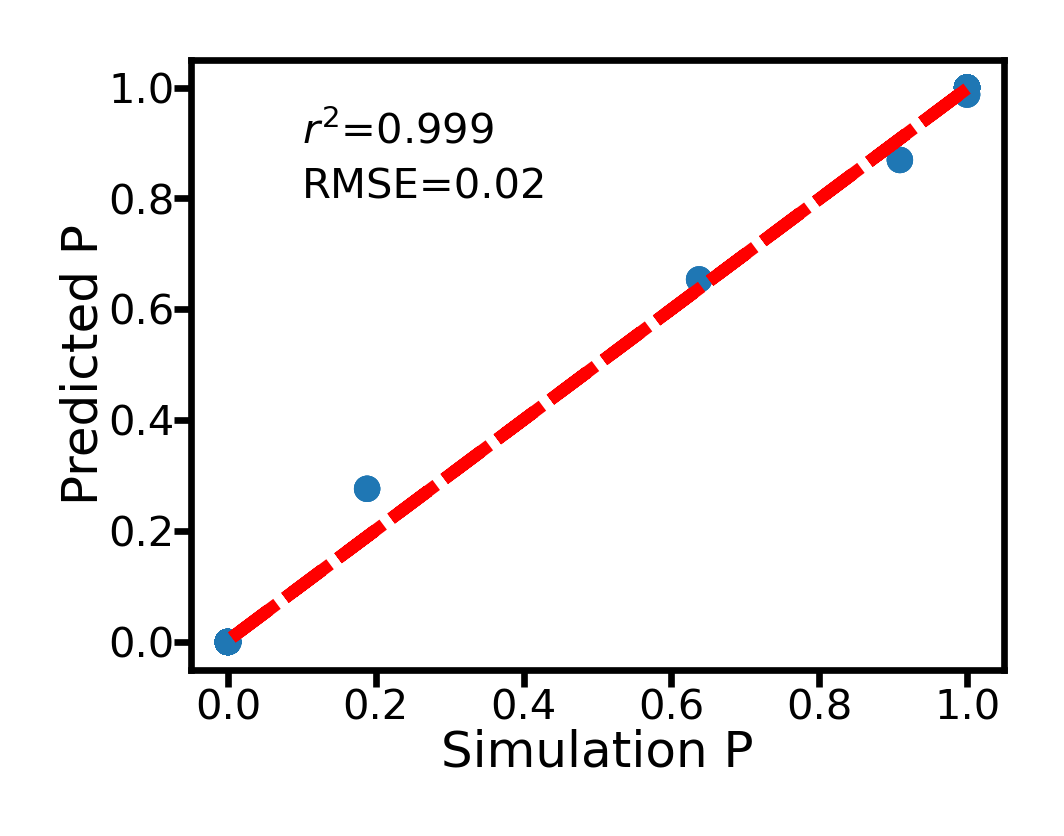

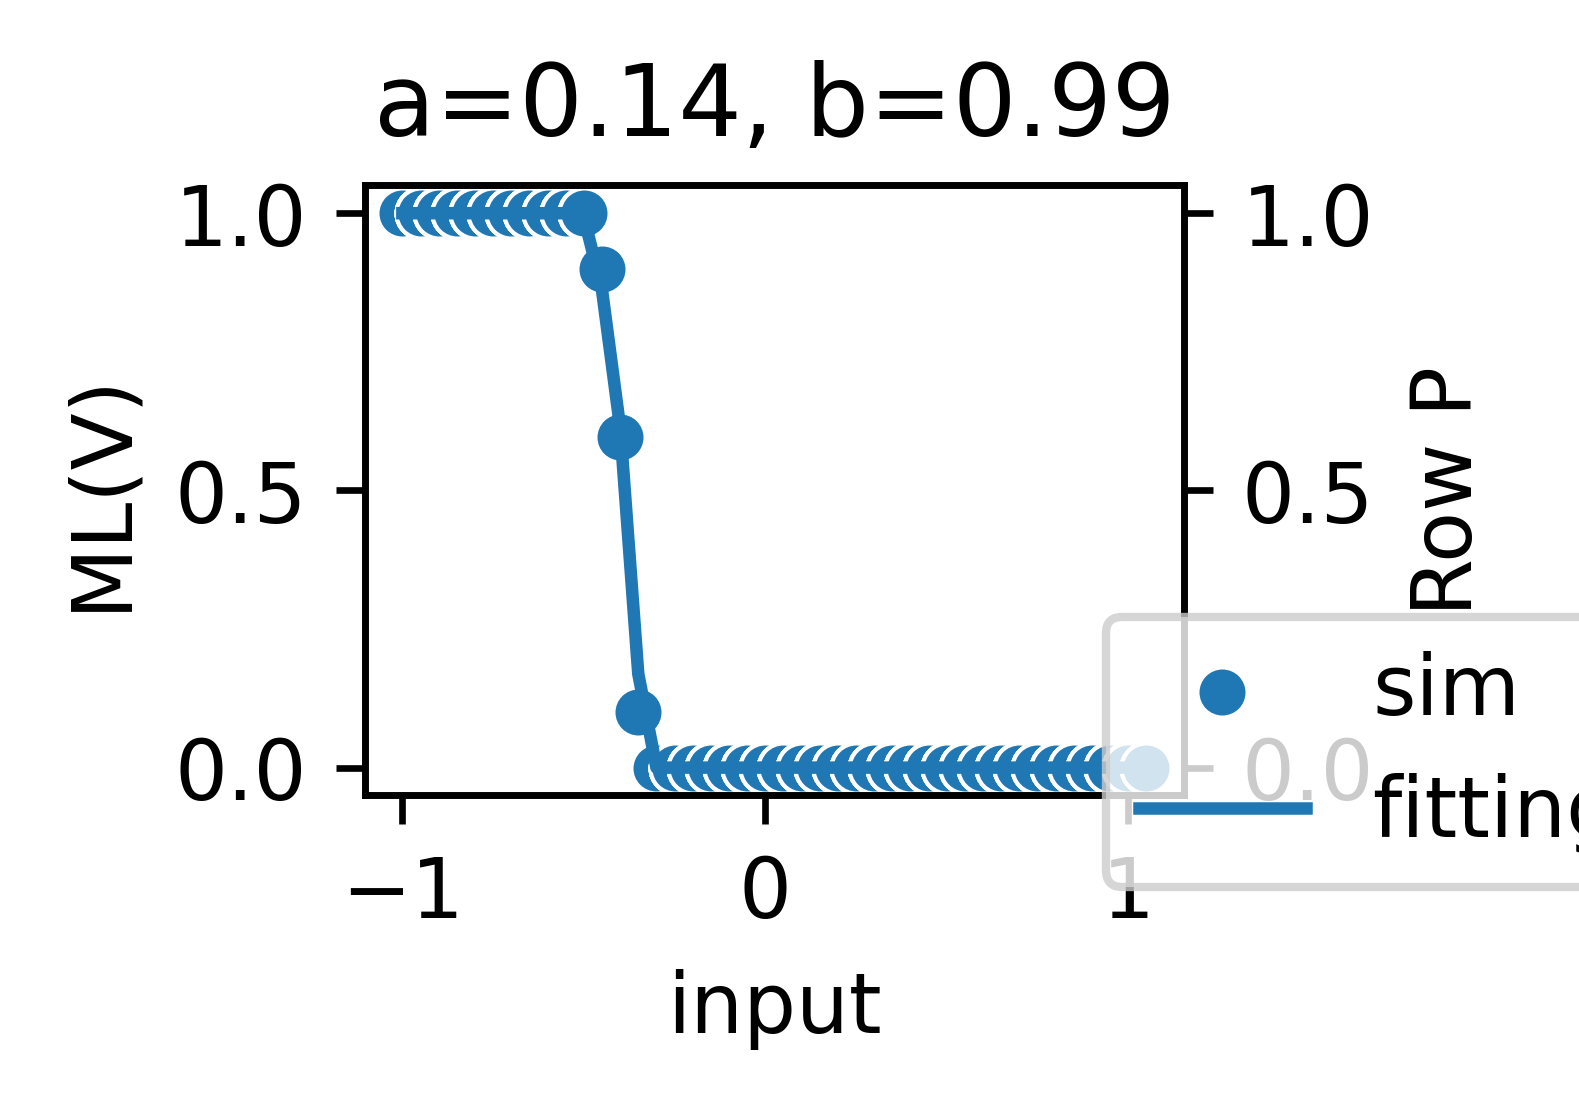

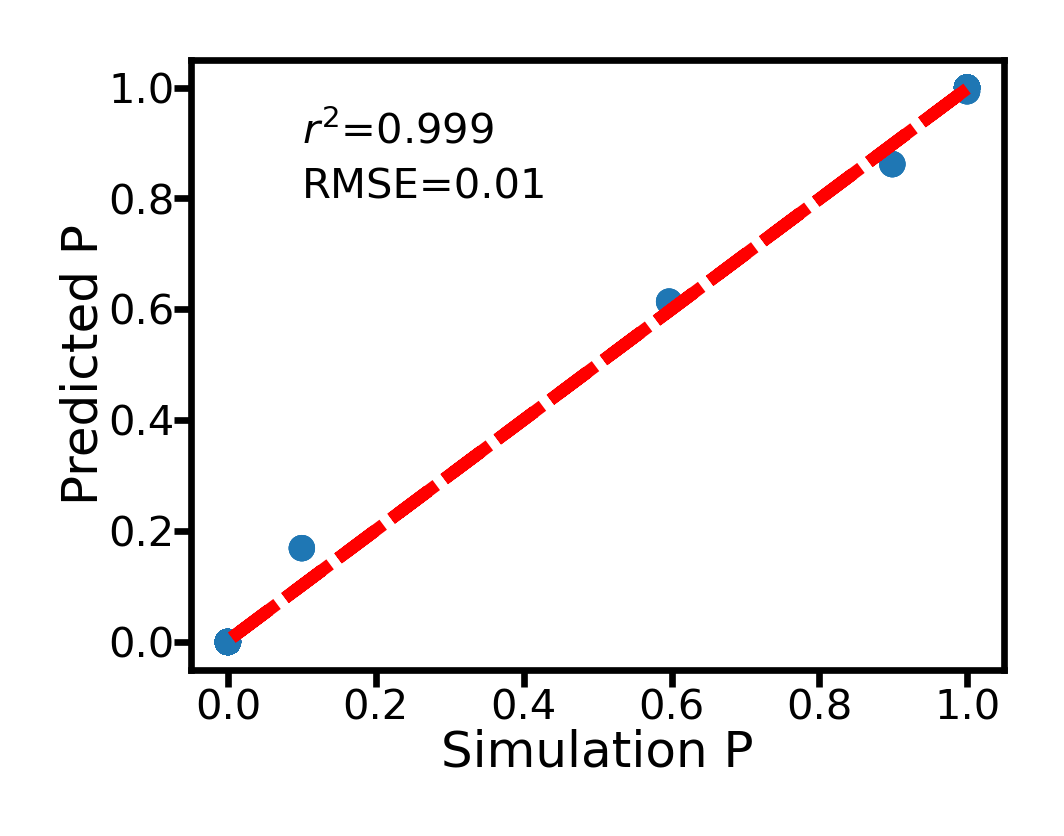

In [31]:
para_fitting = np.array(error_all)
rmse_all = []
for pick_row in range(para_fitting.shape[0]):
    t_sample =   para_fitting[pick_row,3]  
    k_best = para_fitting[pick_row,1]  
    c_best = para_fitting[pick_row,2]  

    x = ML_all[(ML_all['ML']==1)&((ML_all['time']-t_sample).abs()<0.001)]['input']
    y = ML_all[(ML_all['ML']==1)&((ML_all['time']-t_sample).abs()<0.001)]['ML(V)']
    # y = y[x>=-0.5]
    # x = x[x>=-0.5]
    # y = y[x<=0]
    # x = x[x<=0]

    # y1 = sigmoid(x=x,k=-6.75,c=0.1)
    # y2 = sigmoid(x=x,k=-10.18,c=0.35)
    # y3 = sigmoid(x=x,k=-11.26,c=-0.2)
    # y4 = sigmoid(x=x,k=-19.31,c=0.2)
    y0 = sigmoid(x=x,k=k_best,c=c_best)
    rmse_fitting = row_fitting_plot(x,y,y0,col_num=np.power(2,np.minimum(4,Cols_Num_power)))
    # print(rmse_fitting)
    rmse_all.append([t_sample,rmse_fitting])

# y1 = sigmoid(x=x,k=-6.17,c=0.13)
# y2 = sigmoid(x=x,k=-9.9,c=0.35)
# y3 = sigmoid(x=x,k=-10.27,c=-0.2)
# y4 = sigmoid(x=x,k=-17.02,c=0.2)

In [81]:
rmse_all

[[1.0, 0.06390172575475284],
 [2.0, 0.04236315322179734],
 [3.0, 0.05168617491380358],
 [4.0, 0.05408381462020543],
 [5.0, 0.05547122066780516],
 [6.0, 0.06776447305297888],
 [7.0, 0.08748427219674751],
 [8.0, 0.09584427830430148],
 [9.0, 0.105120962570532],
 [10.0, 0.10378761986052956]]

In [82]:
np.array(rmse_all)[:,1].argmin()

1

In [83]:
para_fitting[pick_row,3] 

10.0

Text(0, 0.5, 'RMSE(V)')

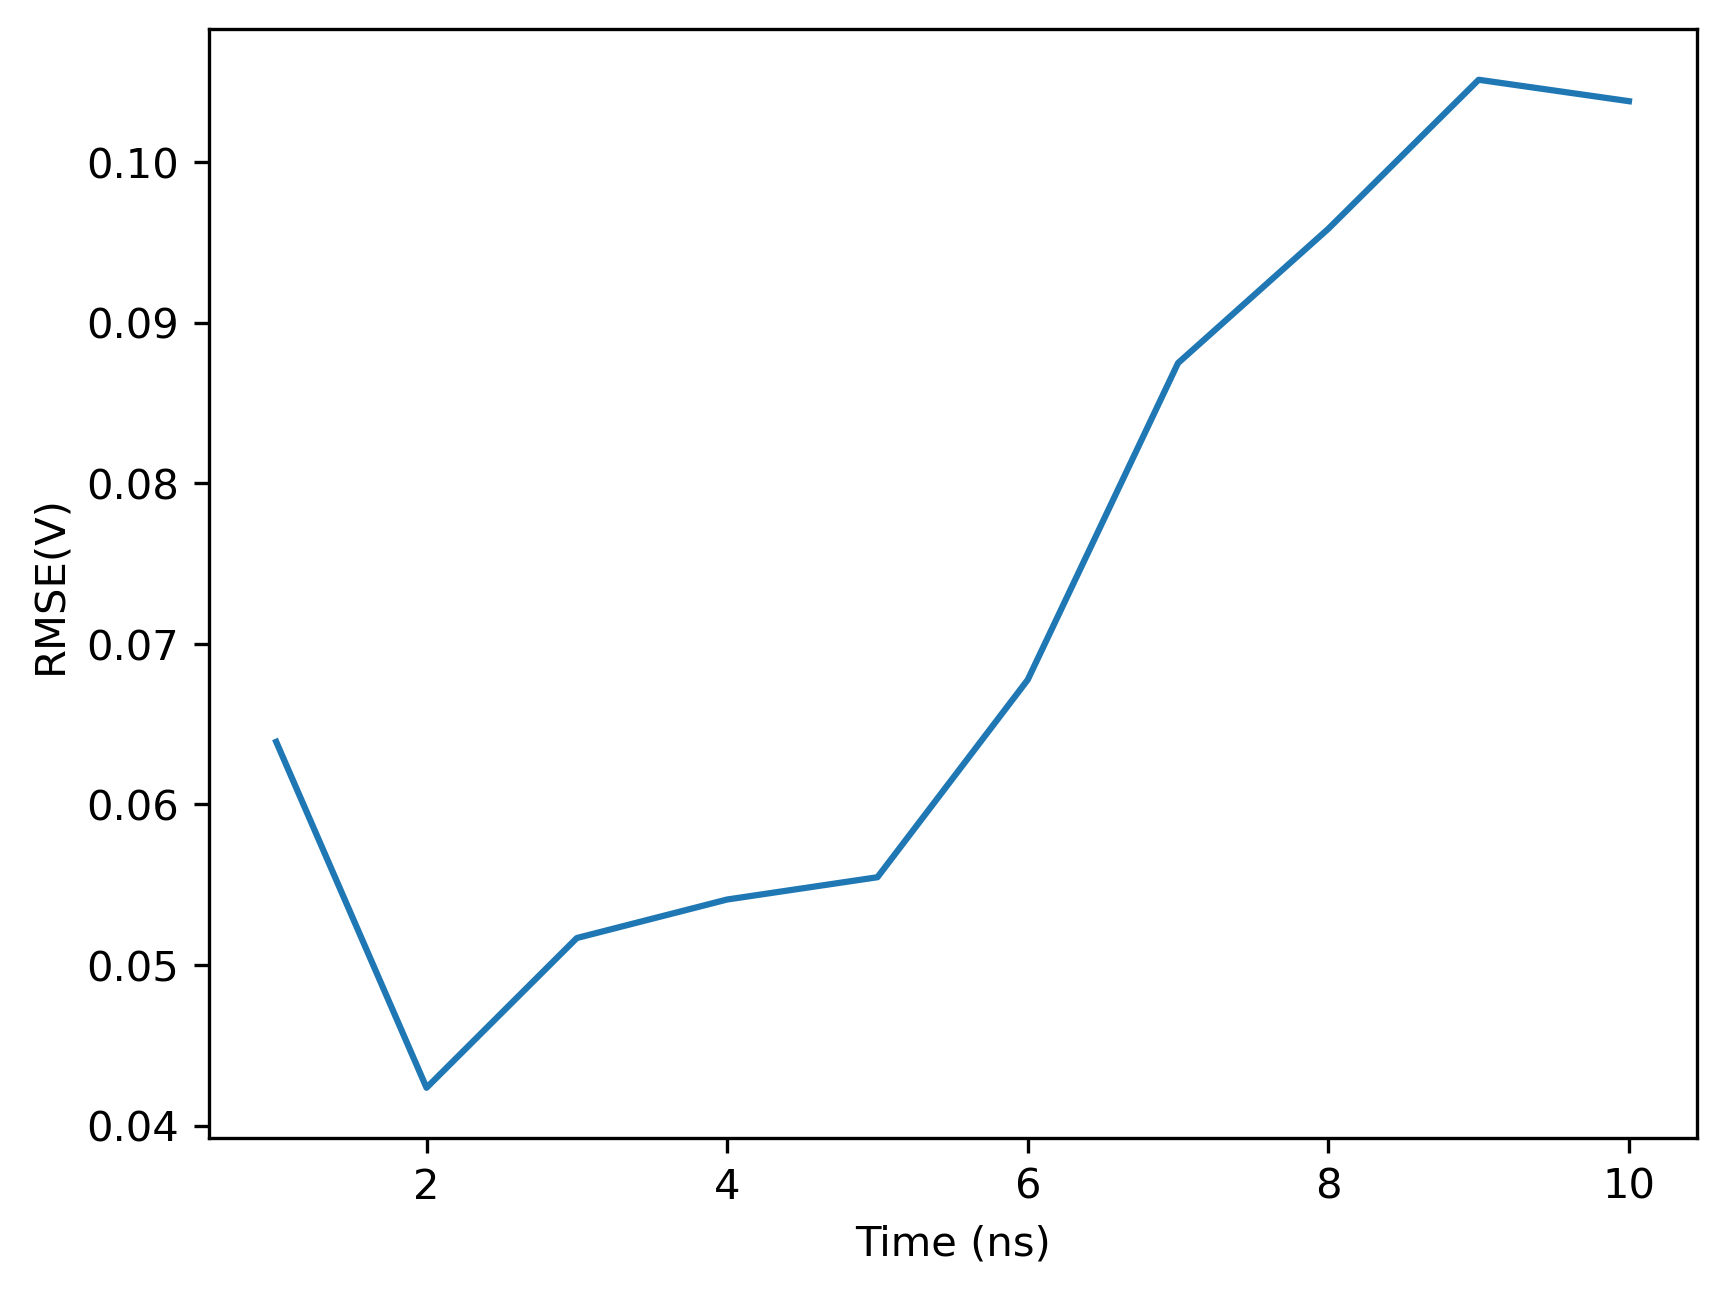

In [84]:
plt.figure(dpi=300)
plt.plot(np.array(rmse_all)[:,0],np.array(rmse_all)[:,1])
plt.xlabel('Time (ns)')
plt.ylabel('RMSE(V)')
# plt.ylim([])

1
0.24
rmse= 0.04236315322179734
r2= 0.9912033593950302


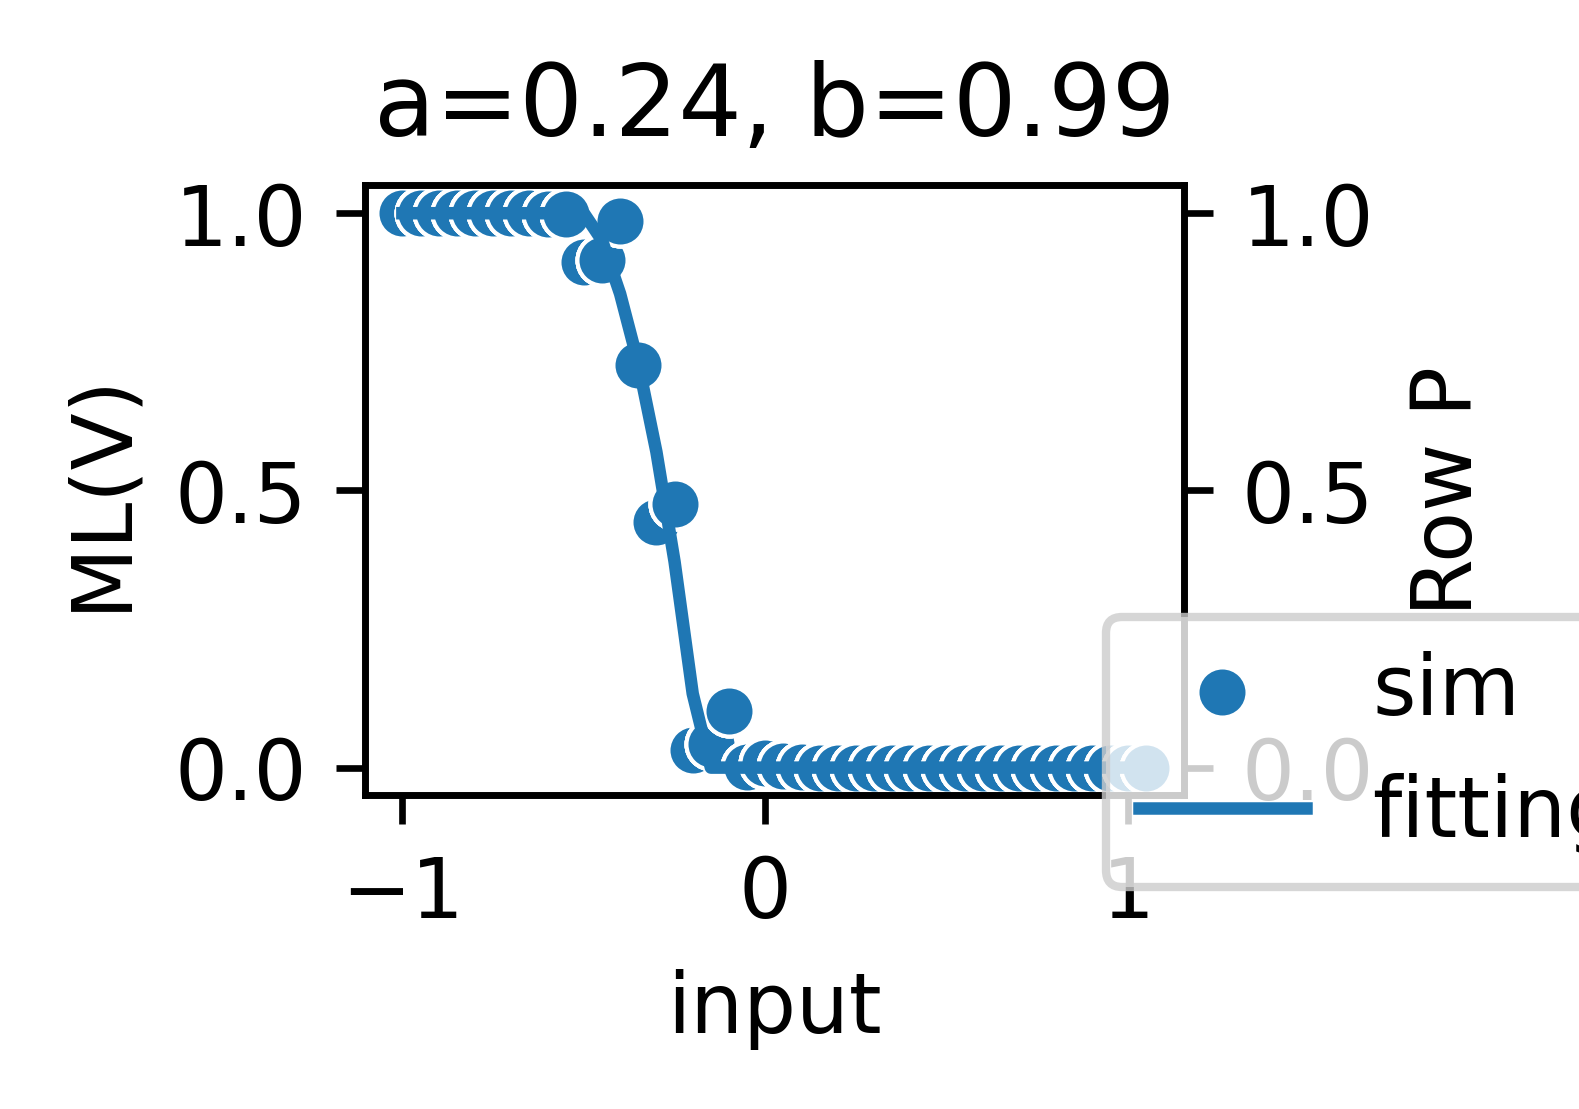

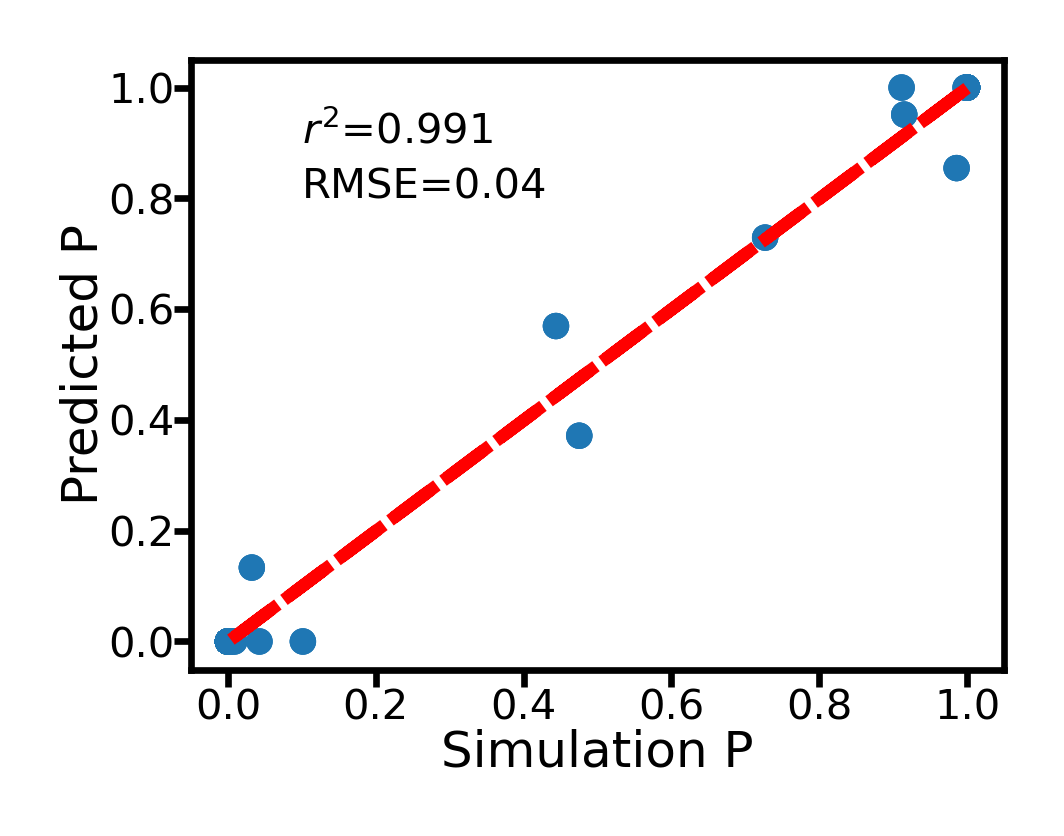

In [85]:


pick_row = np.array(rmse_all)[:,1].argmin()
print(pick_row)
# pick_row = 1
t_sample =   para_fitting[pick_row,3]  
k_best = para_fitting[pick_row,1]  
c_best = para_fitting[pick_row,2]  
# t_sample = 1
x = ML_all[(ML_all['ML']==1)&((ML_all['time']-t_sample).abs()<0.001)]['input']
y = ML_all[(ML_all['ML']==1)&((ML_all['time']-t_sample).abs()<0.001)]['ML(V)']



# y1 = sigmoid(x=x,k=-6.75,c=0.1)
# y2 = sigmoid(x=x,k=-10.18,c=0.35)
# y3 = sigmoid(x=x,k=-11.26,c=-0.2)
# y4 = sigmoid(x=x,k=-19.31,c=0.2)
y0 = sigmoid(x=x,k=k_best,c=c_best)

rmse_fitting = row_fitting_plot(x,y,y0,col_num=4,a_best=0,b_best=0)


# y1 = sigmoid(x=x,k=-6.17,c=0.13)
# y2 = sigmoid(x=x,k=-9.9,c=0.35)
# y3 = sigmoid(x=x,k=-10.27,c=-0.2)
# y4 = sigmoid(x=x,k=-17.02,c=0.2)